#### Telco Classification Analysis
**Artifact: Working Jupyter Notebook**

Presenter: Mijail Q. Mariano

Thursday, July 14th 2022

### Data Acquisition

**<u>Importing Modules & Data</u>**

----

In [505]:
# tabular data modules:
import pandas as pd
from skimpy import clean_columns

# math modules:
import numpy as np

# visualization modules:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

# created data wrangling/cleaning modules
from acquire import get_telco_data
import prepare 
from prepare import clean_telco_data, dummy_columns, train_validate_test_split, model_features

import env
from env import user, password, host, get_connection

----

#### Business Problem: Customer Churn

**<u>Problem Definition/Reframing:</u>** 

Explore and understand potential key drivers in a customer's life-cycle that may directly influence their decision to remain with the company or ultimately, make the decision to leave (churn).

**Insights from initial data analysis (storytelling module):**

1. Month-to-Month customers are more likely to churn than 1 & 2 year contract customers
2. Fiber Optic customers are more likely to churn than DSL & No Internet Customers
3. Customers WITHOUT dependents are more likely to churn than customers WITH dependents
4. Customers who pay/paid with Electronic-checks are more likely to churn than customers who pay with other methods
    - Mailed Check
    - Bank Transfer (automatic)
    - Credit Card (automatic)

----

In [506]:
telco_df = get_telco_data()

In [507]:
type(telco_df)

pandas.core.frame.DataFrame

In [508]:
telco_df.head()

,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type,customer_id,gender,senior_citizen,partner,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,1,DSL,2,Mailed check,2,One year,0002-ORFBO,Female,0,Yes,...,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No
1,1,DSL,2,Mailed check,1,Month-to-month,0003-MKNFE,Male,0,No,...,No,No,No,No,No,Yes,No,59.90,542.4,No
2,1,DSL,4,Credit card (automatic),1,Month-to-month,0013-MHZWF,Female,0,No,...,No,No,No,Yes,Yes,Yes,Yes,69.40,571.45,No
3,1,DSL,1,Electronic check,1,Month-to-month,0015-UOCOJ,Female,1,No,...,Yes,No,No,No,No,No,Yes,48.20,340.35,No
4,1,DSL,2,Mailed check,3,Two year,0016-QLJIS,Female,0,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No


In [509]:
# initial dataframe shape

initial_shape = telco_df.shape
initial_shape

(7043, 24)

In [510]:
telco_df.head()

,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type,customer_id,gender,senior_citizen,partner,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,1,DSL,2,Mailed check,2,One year,0002-ORFBO,Female,0,Yes,...,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No
1,1,DSL,2,Mailed check,1,Month-to-month,0003-MKNFE,Male,0,No,...,No,No,No,No,No,Yes,No,59.90,542.4,No
2,1,DSL,4,Credit card (automatic),1,Month-to-month,0013-MHZWF,Female,0,No,...,No,No,No,Yes,Yes,Yes,Yes,69.40,571.45,No
3,1,DSL,1,Electronic check,1,Month-to-month,0015-UOCOJ,Female,1,No,...,Yes,No,No,No,No,No,Yes,48.20,340.35,No
4,1,DSL,2,Mailed check,3,Two year,0016-QLJIS,Female,0,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No


In [511]:
# using the prepare.py clean_telco_data function to clean the telco dataset
telco_df = clean_telco_data(telco_df)

In [512]:
telco_df.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,DSL,Mailed Check,One Year,0002-ORFBO,Female,False,Yes,Yes,9,Yes,...,No,Yes,No,Yes,Yes,No,Yes,65.60,593.30,False
1,DSL,Mailed Check,Month-to-Month,0003-MKNFE,Male,False,No,No,9,Yes,...,No,No,No,No,No,Yes,No,59.90,542.40,False
2,DSL,Credit Card (automatic),Month-to-Month,0013-MHZWF,Female,False,No,Yes,9,Yes,...,No,No,No,Yes,Yes,Yes,Yes,69.40,571.45,False
3,DSL,E-Check,Month-to-Month,0015-UOCOJ,Female,True,No,No,7,Yes,...,Yes,No,No,No,No,No,Yes,48.20,340.35,False
4,DSL,Mailed Check,Two Year,0016-QLJIS,Female,False,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.90,False


In [513]:
telco_df.columns.nunique() # after dropping unneeded columns

21

In [514]:
# creating dummy variables for categorical columns/features
# will also want to create a function for future use

categorical_lst = [
        'internet_service_type', \
       'payment_type', \
       'contract_type', \
       'gender', \
       'partner', \
       'dependents', \
       'phone_service', \
       'multiple_lines', \
       'online_security', \
       'online_backup', \
       'device_protection', \
       'tech_support', \
       'streaming_tv', \
       'streaming_movies', \
       'paperless_billing']

dummy_df = pd.get_dummies(telco_df[categorical_lst])
dummy_df = clean_columns(dummy_df, case = "snake") # cleaning column names for uniformity
telco_df = pd.concat([telco_df, dummy_df], axis = 1)

In [515]:
dummy_shape = telco_df.shape

print(f'Initial Telco Dataframe shape: {initial_shape}')
print(f'Secondary Telco Dataframe shape: {dummy_shape}')

Initial Telco Dataframe shape: (7043, 24)
Secondary Telco Dataframe shape: (7043, 62)


In [516]:
telco_df.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support_no_internet_service,tech_support_yes,streaming_tv_no,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no,streaming_movies_no_internet_service,streaming_movies_yes,paperless_billing_no,paperless_billing_yes
0,DSL,Mailed Check,One Year,0002-ORFBO,Female,False,Yes,Yes,9,Yes,...,0,1,0,0,1,1,0,0,0,1
1,DSL,Mailed Check,Month-to-Month,0003-MKNFE,Male,False,No,No,9,Yes,...,0,0,1,0,0,0,0,1,1,0
2,DSL,Credit Card (automatic),Month-to-Month,0013-MHZWF,Female,False,No,Yes,9,Yes,...,0,1,0,0,1,0,0,1,0,1
3,DSL,E-Check,Month-to-Month,0015-UOCOJ,Female,True,No,No,7,Yes,...,0,0,1,0,0,1,0,0,0,1
4,DSL,Mailed Check,Two Year,0016-QLJIS,Female,False,Yes,Yes,65,Yes,...,0,1,0,0,1,0,0,1,0,1


In [517]:
telco_df.dtypes.value_counts()

uint8      41
object     16
bool        2
float64     2
int64       1
dtype: int64

In [518]:
# converting dummy columns "uint8" to "boolean" type

col_names = telco_df.select_dtypes(include = "uint8").columns
telco_df[col_names] = telco_df[col_names].astype(bool)

In [519]:
telco_df.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support_no_internet_service,tech_support_yes,streaming_tv_no,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no,streaming_movies_no_internet_service,streaming_movies_yes,paperless_billing_no,paperless_billing_yes
0,DSL,Mailed Check,One Year,0002-ORFBO,Female,False,Yes,Yes,9,Yes,...,False,True,False,False,True,True,False,False,False,True
1,DSL,Mailed Check,Month-to-Month,0003-MKNFE,Male,False,No,No,9,Yes,...,False,False,True,False,False,False,False,True,True,False
2,DSL,Credit Card (automatic),Month-to-Month,0013-MHZWF,Female,False,No,Yes,9,Yes,...,False,True,False,False,True,False,False,True,False,True
3,DSL,E-Check,Month-to-Month,0015-UOCOJ,Female,True,No,No,7,Yes,...,False,False,True,False,False,True,False,False,False,True
4,DSL,Mailed Check,Two Year,0016-QLJIS,Female,False,Yes,Yes,65,Yes,...,False,True,False,False,True,False,False,True,False,True


In [520]:
cat_lst = telco_df.select_dtypes(include = "object").columns

In [521]:
cat_lst = cat_lst.drop(["customer_id"])

In [522]:
cat_lst

Index(['internet_service_type', 'payment_type', 'contract_type', 'gender',
       'partner', 'dependents', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing'],
      dtype='object')

In [523]:
cat_lst.nunique()

15

In [524]:
# printing unique values per column using a for loop 

for column in telco_df[cat_lst]:
    print(f"Unique {column}'s count: {telco_df[column].nunique()}")
    print(f'{telco_df[column].unique()}', "\n")

Unique internet_service_type's count: 3
['DSL' 'Fiber Optic' 'No internet service'] 

Unique payment_type's count: 4
['Mailed Check' 'Credit Card (automatic)' 'E-Check'
 'Bank Transfer (automatic'] 

Unique contract_type's count: 3
['One Year' 'Month-to-Month' 'Two Year'] 

Unique gender's count: 2
['Female' 'Male'] 

Unique partner's count: 2
['Yes' 'No'] 

Unique dependents's count: 2
['Yes' 'No'] 

Unique phone_service's count: 2
['Yes' 'No'] 

Unique multiple_lines's count: 3
['No' 'Yes' 'No phone service'] 

Unique online_security's count: 3
['No' 'Yes' 'No internet service'] 

Unique online_backup's count: 3
['Yes' 'No' 'No internet service'] 

Unique device_protection's count: 3
['No' 'Yes' 'No internet service'] 

Unique tech_support's count: 3
['Yes' 'No' 'No internet service'] 

Unique streaming_tv's count: 3
['Yes' 'No' 'No internet service'] 

Unique streaming_movies's count: 3
['No' 'Yes' 'No internet service'] 

Unique paperless_billing's count: 2
['Yes' 'No'] 



In [525]:
telco_df["payment_type"].unique()

array(['Mailed Check', 'Credit Card (automatic)', 'E-Check',
       'Bank Transfer (automatic'], dtype=object)

In [526]:
telco_df["payment_type"].unique()

array(['Mailed Check', 'Credit Card (automatic)', 'E-Check',
       'Bank Transfer (automatic'], dtype=object)

----

### Univariable Plotting of Categorical Columns by Frequency

1869 total Churn customers*

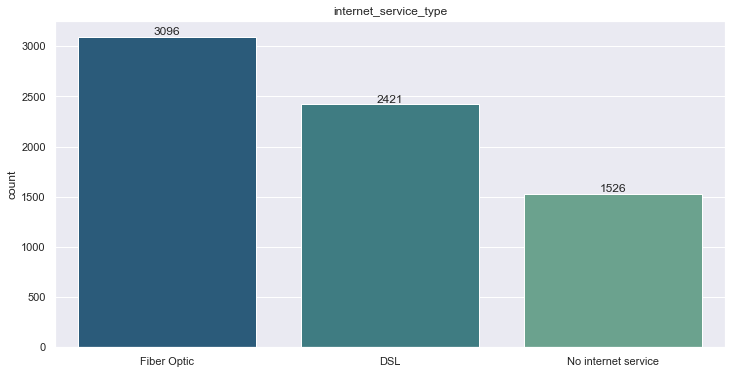

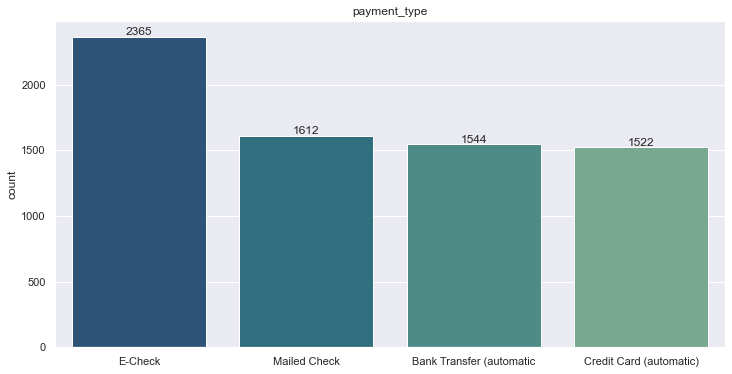

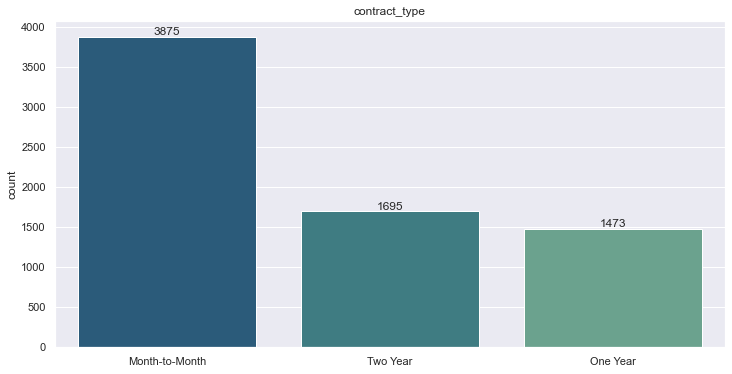

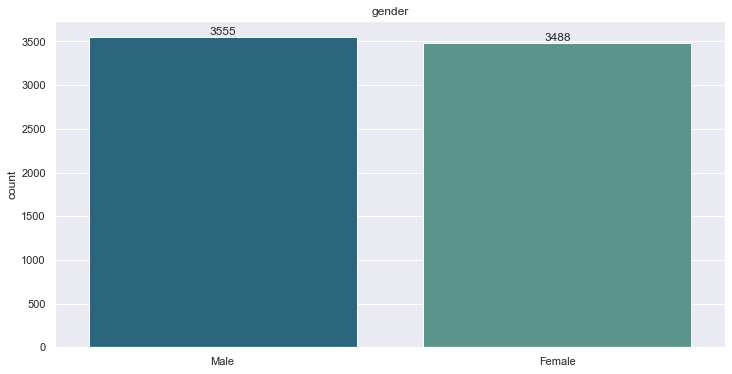

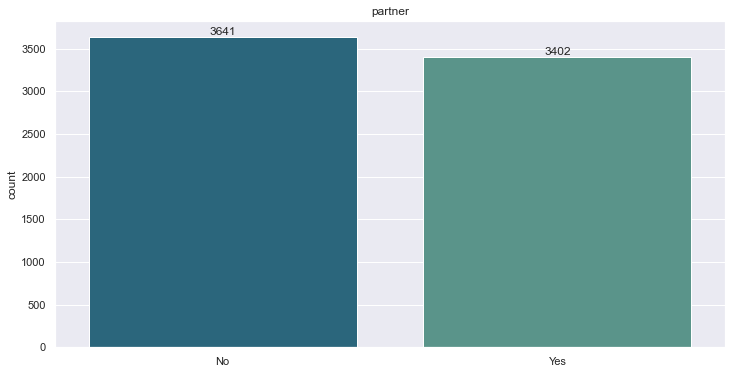

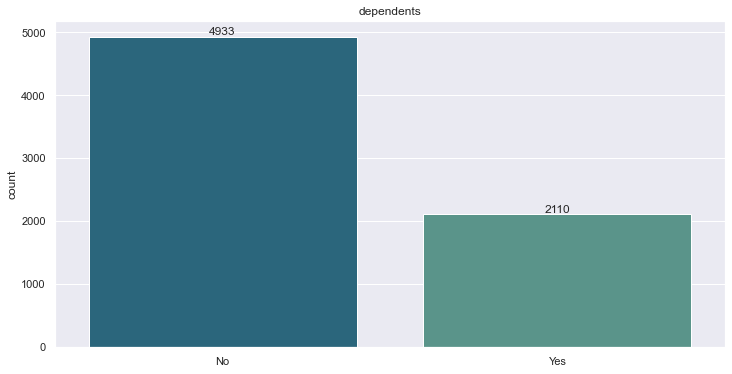

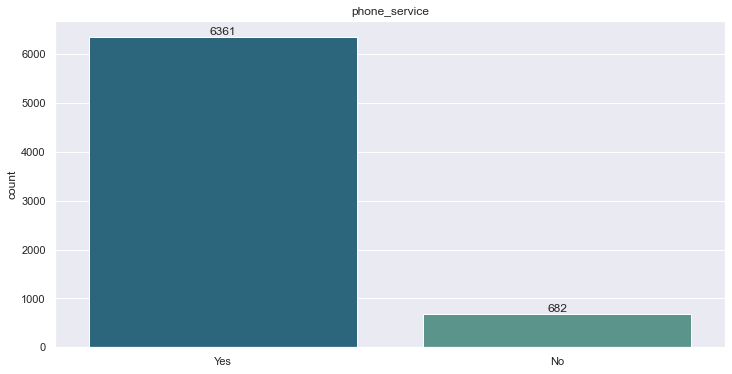

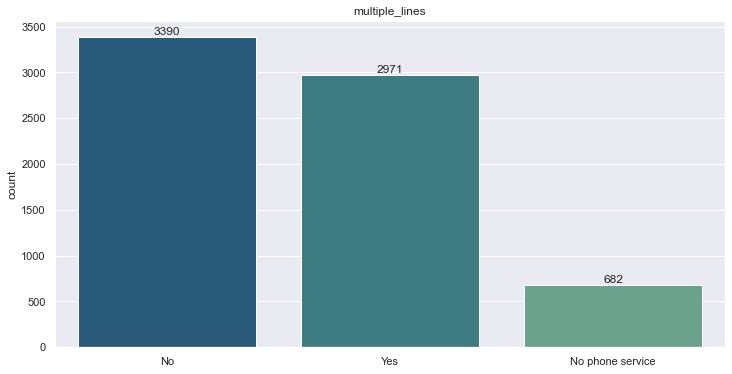

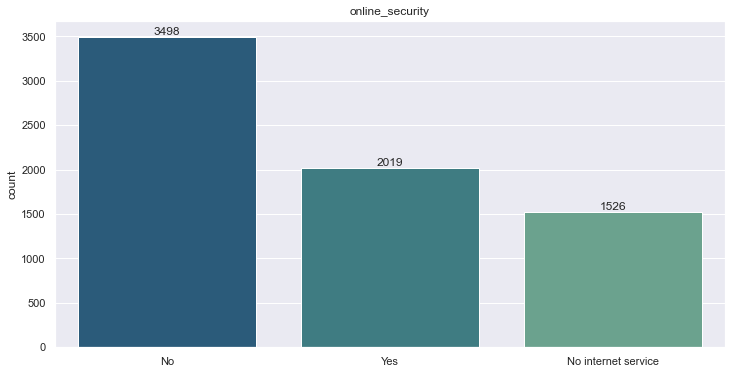

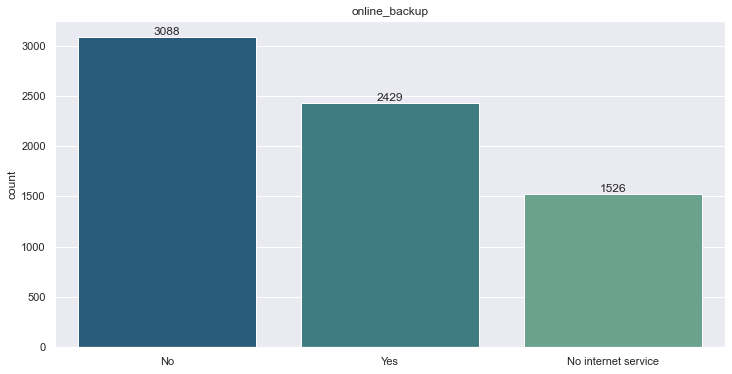

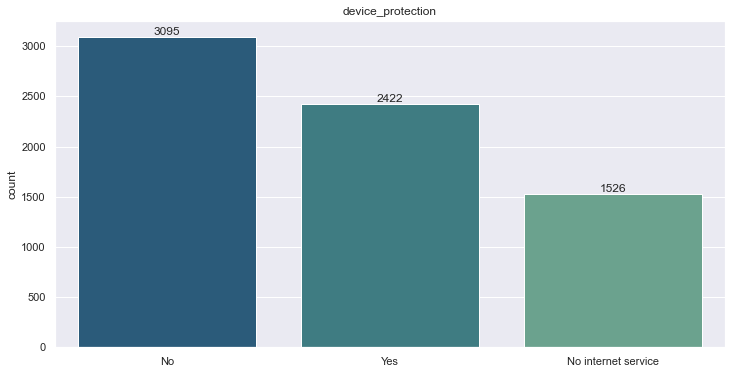

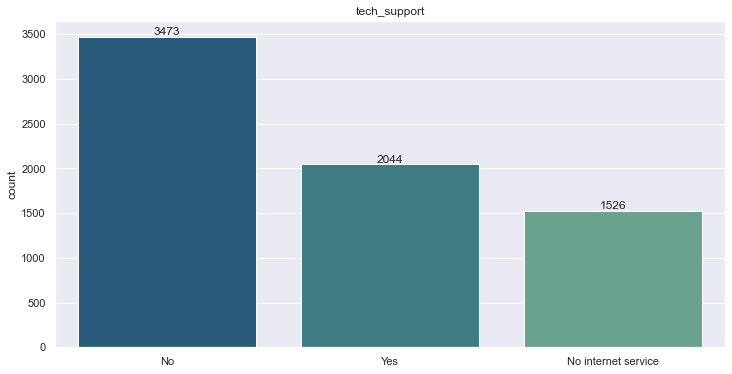

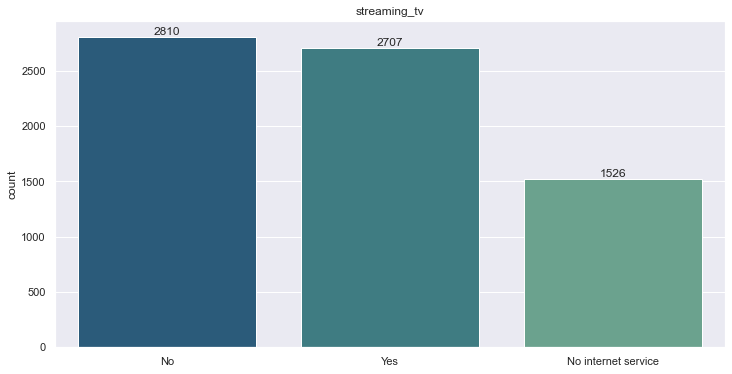

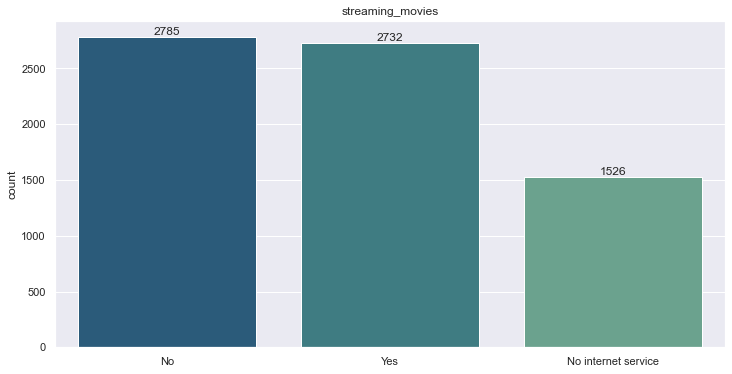

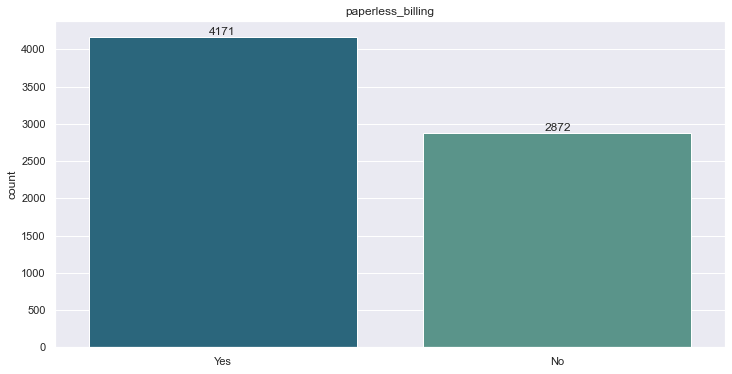

In [527]:
for column in telco_df[cat_lst]:
    if telco_df[column].dtype != "int" or telco_df[column].dtype != "float":
        plt.figure(figsize=(12, 6))
        sns.set(font_scale = 1)
        ax = sns.countplot(x = column, 
                        data = telco_df,
                        palette = "crest_r",
                        order = telco_df[column].value_counts().index)
        ax.bar_label(ax.containers[0])
        ax.set(xlabel=None)
        plt.title(column)
        plt.show()

In [528]:
telco_df["churn"] = telco_df["churn"].replace({"No": 0, "Yes": 1}).astype("bool")

In [529]:
churn_rate = round(telco_df["churn"].mean(), 3)
churn_rate

0.265

Text(0.5, 0, 'Churned')

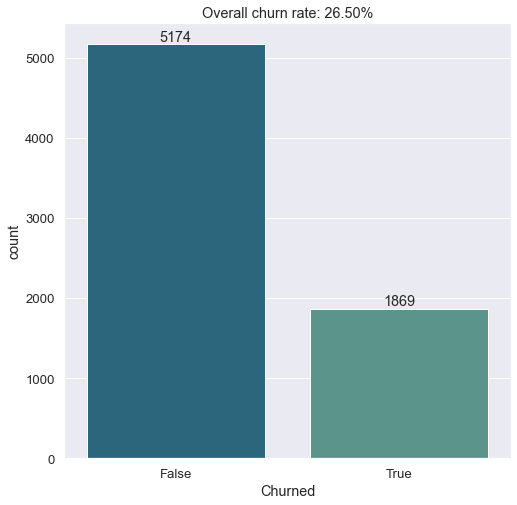

In [530]:
# plotting the total churn vs. non-churn customers

plt.figure(figsize=(8, 8))
sns.set(font_scale = 1.2)
ax = sns.countplot(x = "churn", 
    data = telco_df,
    order = telco_df["churn"].value_counts().index,
    palette = "crest_r")

ax.bar_label(ax.containers[0])

plt.xticks(rotation = 0)
plt.title(f"Overall churn rate: {churn_rate:.2%}")
plt.xlabel("Churned")

----
### Univariable Plotting of Conteneous/numerical Columns by Frequency


In [531]:
telco_df.dtypes

internet_service_type                   object
payment_type                            object
contract_type                           object
customer_id                             object
gender                                  object
                                         ...  
streaming_movies_no                       bool
streaming_movies_no_internet_service      bool
streaming_movies_yes                      bool
paperless_billing_no                      bool
paperless_billing_yes                     bool
Length: 62, dtype: object

In [532]:
telco_df.isnull().sum()

internet_service_type                   0
payment_type                            0
contract_type                           0
customer_id                             0
gender                                  0
                                       ..
streaming_movies_no                     0
streaming_movies_no_internet_service    0
streaming_movies_yes                    0
paperless_billing_no                    0
paperless_billing_yes                   0
Length: 62, dtype: int64

In [533]:
# 3 total numerical columns 

telco_df.select_dtypes(include = "number").columns

Index(['tenure', 'monthly_charges', 'total_charges'], dtype='object')

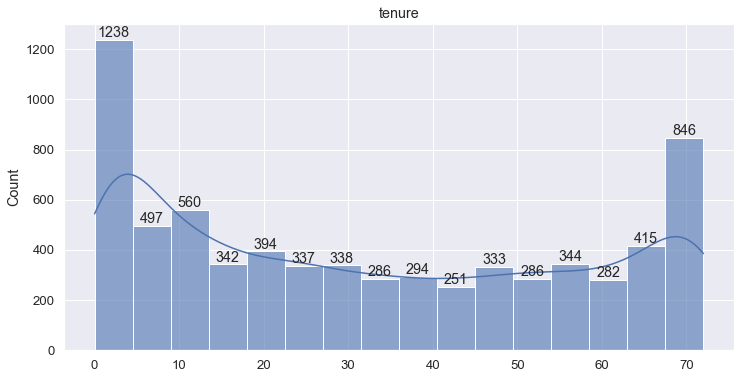

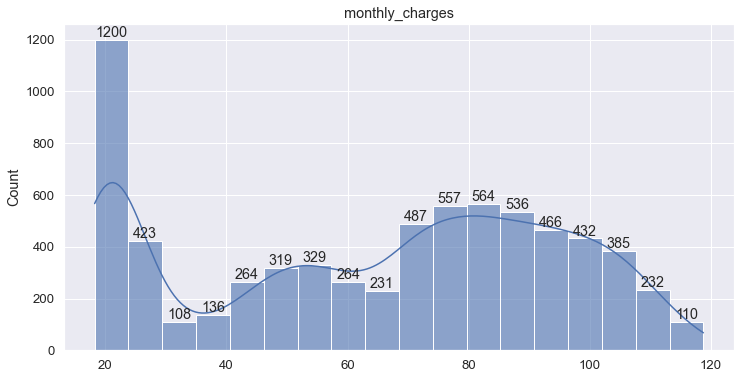

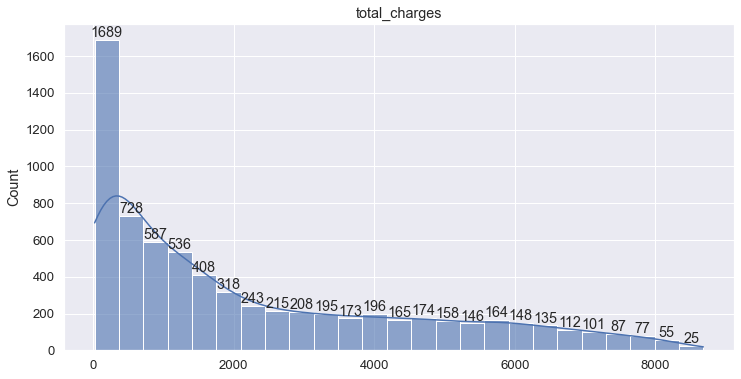

In [534]:
for column in telco_df.columns:
    if telco_df[column].dtype == "int" or telco_df[column].dtype == "float":
        plt.figure(figsize=(12, 6))
        ax = sns.histplot(x = column, 
                        data = telco_df,
                        kde = True,
                        alpha = 0.6)
        ax.set(xlabel = None)
        ax.bar_label(ax.containers[0])
        plt.title(column)
        plt.show()

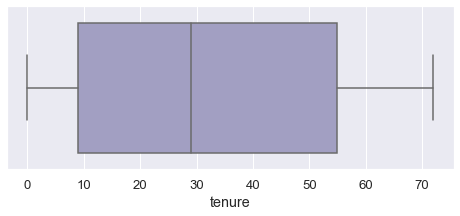

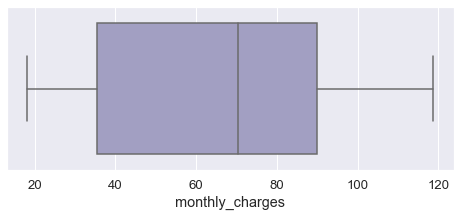

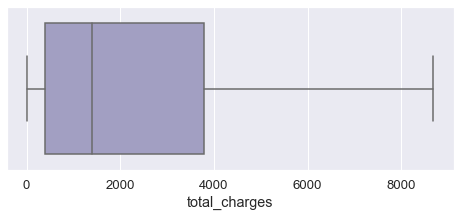

In [535]:
for column in telco_df.columns:
    if telco_df[column].dtype == "int" or telco_df[column].dtype == "float":
        plt.figure(figsize=(8, 3))
        sns.set(font_scale = 1.2)
        ax = sns.boxplot(x = telco_df[column], palette = "Purples")
        
        plt.show()

In [536]:
# viewing churn correlation amongst all data features

telco_df.corr()["churn"].sort_values(ascending = False)

churn                                        1.000000
contract_type_month_to_month                 0.405103
online_security_no                           0.342637
tech_support_no                              0.337281
internet_service_type_fiber_optic            0.308020
payment_type_e_check                         0.301919
online_backup_no                             0.268005
device_protection_no                         0.252481
monthly_charges                              0.193356
paperless_billing_yes                        0.191825
dependents_no                                0.164221
senior_citizen                               0.150889
partner_no                                   0.150448
streaming_movies_no                          0.130845
streaming_tv_no                              0.128916
streaming_tv_yes                             0.063228
streaming_movies_yes                         0.061382
multiple_lines_yes                           0.040102
phone_service_yes           

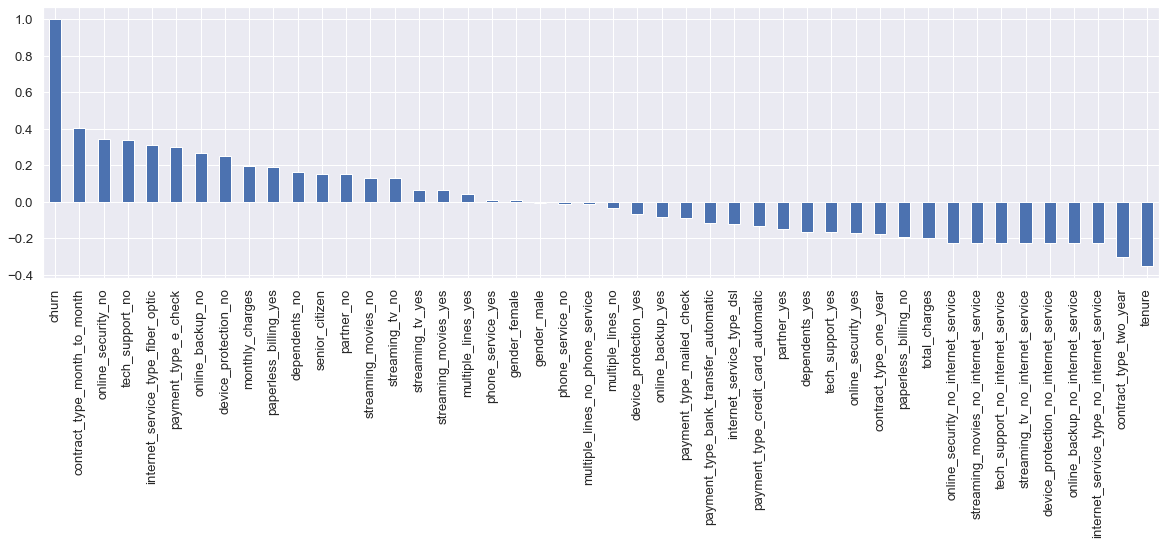

In [537]:
# plotting churn correlation amongst all data features

plt.figure(figsize=(12, 5))
telco_df.corr()["churn"].sort_values(ascending = False).plot(kind = "bar", figsize=(20, 5))
plt.show()

-----
#### Splitting the Telco Dataset in Train, Validate, and Test

In [538]:
train, validate, test = train_validate_test_split(telco_df)

In [539]:
print(f"Train dataset shape: {train.shape}")
print(f"Validate dataset shape: {validate.shape}")
print(f"Test dataset shape: {test.shape}")

Train dataset shape: (3943, 62)
Validate dataset shape: (1691, 62)
Test dataset shape: (1409, 62)


----
## Exploration Phase

**<u>Key Questions:</u>**

y = decision to churn

X = independent variable

1. Do the current “Internet Options” have an effect on customers’ decision to churn?
    - Comparing Categorical to Categorical (Chi Squared Test) 
<br><br>
2. Does the “Tech Support” option have an impact on their decision to churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>
3. Did a customer’s “Payment Type” have an effect on customers’ decision to churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>
4. Does a customer’s ability to “Stream Movies” impact their decision to churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>

**(Bonus)**

5. Does a customer’s ability to “Stream TV” impact their decision to churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>
6. Does a customer’s “Total Charges” impact their decision to churn?
    
    - Comparing Continuous Value to Categorical (T-test)

In [540]:
# importing necessary modules:

import scipy.stats as stats

**<u>Notes on ChiSquared Testing</u>**

**Assumptions**
* When testing the data, the cells should be frequencies or counts of cases and not percentages. It is okay to convert to percentages after testing the data
* The levels (categories) of the variables being tested are mutually exclusive
* Each participant contributes to only one cell within the Chi-square table
* The groups being tested must be independent
* The value of expected cells should be greater than 5

----

## Question #1: Do the current internet options have an effect on customers' decision to churn?

<u>**Hypothesis Formulation (internet options):**</u>

$H_0$: "There is NO association/relationship between internet options and customer churn."

$H_a$: "There IS an association/relationship between internet options and customer churn."

$\alpha$: 0.05

----

In [541]:
alpha = 0.05

In [542]:
# cleaning the data -- setting up my variables:

In [543]:
train["internet_service_type"].unique()

array(['No internet service', 'Fiber Optic', 'DSL'], dtype=object)

In [544]:
# Fiber Optic            1740
# DSL                    1365
# No internet service     838

train["internet_service_type"].value_counts()

Fiber Optic            1740
DSL                    1365
No internet service     838
Name: internet_service_type, dtype: int64

In [545]:
# creating new dataframe

internet_df = train

In [546]:
internet_df.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support_no_internet_service,tech_support_yes,streaming_tv_no,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no,streaming_movies_no_internet_service,streaming_movies_yes,paperless_billing_no,paperless_billing_yes
5657,No internet service,Mailed Check,Month-to-Month,1051-EQPZR,Female,False,Yes,Yes,44,Yes,...,True,False,False,True,False,False,True,False,True,False
3796,Fiber Optic,Credit Card (automatic),Month-to-Month,4450-DLLMH,Male,False,No,No,2,Yes,...,False,False,True,False,False,True,False,False,False,True
4566,Fiber Optic,Credit Card (automatic),Month-to-Month,6833-JMZYP,Female,False,No,No,15,Yes,...,False,False,False,False,True,False,False,True,False,True
2389,DSL,Mailed Check,One Year,9830-ECLEN,Male,False,Yes,Yes,58,No,...,False,False,False,False,True,True,False,False,True,False
2793,Fiber Optic,E-Check,Month-to-Month,1200-TUZHR,Female,True,No,No,8,Yes,...,False,False,True,False,False,False,False,True,True,False


In [547]:
internet_df.shape # checking the returned number of values/observations 

(3943, 62)

In [548]:
# creating my "observed" values

observed = pd.crosstab(index = internet_df["internet_service_type"], columns = internet_df["churn"], margins = True)
observed

churn,False,True,All
internet_service_type,,,
DSL,1106,259,1365
Fiber Optic,1016,724,1740
No internet service,775,63,838
All,2897,1046,3943


In [549]:
# running the ChiSquared Test

chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

In [550]:
print("\n","Observed Values:", "\n", observed.values)
print("-----","\n","Expected Values:", "\n", exp_values.astype(int))

print("-----","\n","chi2 = ", chi.round(2))
print("p_value =", p_value.round(5))
print("Degrees of Freedom =", degf)


 Observed Values: 
 [[1106  259 1365]
 [1016  724 1740]
 [ 775   63  838]
 [2897 1046 3943]]
----- 
 Expected Values: 
 [[1002  362 1365]
 [1278  461 1740]
 [ 615  222  838]
 [2897 1046 3943]]
----- 
 chi2 =  398.38
p_value = 0.0
Degrees of Freedom = 6


In [551]:
if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("Fail to reject Null Hypothesis.")

REJECT Null Hypothesis.


**Conclusion:**

1. Given the relatively low p-value in our ChiSquared Test - we can conclude with a 95% confidence interval in this dataset that there is an association/relationship between internet options (DSL or Fiber Optic) and their decision to churn.
   
   *Internet Options:*

       - DSL
       - Fiber Optic
       - No internet service
  
<br><br>
2. We will therefore carry these features forward into future predictive modeling.

----

## Question #2: Does opting for “Tech Support” service have an impact on their decision to churn?


<u>**Hypothesis Formulation (tech support option):**</u>

$H_0$: "There is NO association/relationship between a customer's tech support option and their decision to churn."

$H_a$: "There IS an association/relationship between a customer's tech support option and their decision to churn.""


$\alpha$: 0.05

----

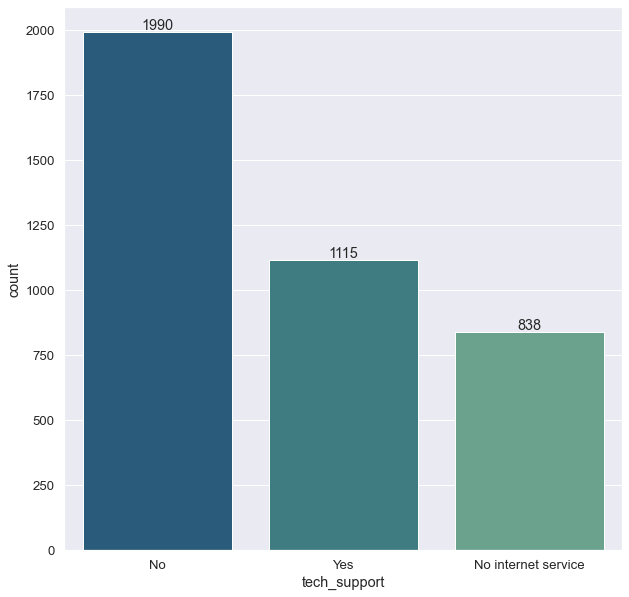

In [552]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(x = "tech_support", 
    data = train,
    order = train["tech_support"].value_counts().index,
    palette = "crest_r")

ax.bar_label(ax.containers[0])
plt.show()

In [553]:
alpha = 0.05

In [554]:
train["tech_support"].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

In [555]:
# creating new dataframe

tech_support = train

In [556]:
tech_support.shape

(3943, 62)

In [557]:
# tech_support dataframe summary statistics

summary_stats = tech_support.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
tenure,3943.0,32.531829,24.542655,0.0,9.000,29.00,56.000,72.0
monthly_charges,3943.0,65.119883,30.023920,18.4,38.175,70.60,90.050,118.6
total_charges,3943.0,2313.859067,2284.689172,18.8,402.725,1415.55,3840.675,8684.8


In [558]:
# summary statistics with "range" column

summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats

,count,mean,std,min,25%,50%,75%,max,range
tenure,3943.0,32.531829,24.542655,0.0,9.000,29.00,56.000,72.0,72.0
monthly_charges,3943.0,65.119883,30.023920,18.4,38.175,70.60,90.050,118.6,100.2
total_charges,3943.0,2313.859067,2284.689172,18.8,402.725,1415.55,3840.675,8684.8,8666.0


In [559]:
# creating an observation table of the dataframe

observed = pd.crosstab(index = tech_support["tech_support"], columns = tech_support["churn"], margins = True)
observed

churn,False,True,All
tech_support,,,
No,1173,817,1990
No internet service,775,63,838
Yes,949,166,1115
All,2897,1046,3943


In [560]:
# running the ChiSquared Test

chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

In [561]:
print("\n","Observed Values:", "\n", observed.values, "-----","\n")
print("Expected Values:", "\n", exp_values.astype(int), "-----","\n")

print("chi2 = ", chi.round(2))
print("p_value =", p_value.round(5))
print("Degrees of Freedom =", degf)


 Observed Values: 
 [[1173  817 1990]
 [ 775   63  838]
 [ 949  166 1115]
 [2897 1046 3943]] ----- 

Expected Values: 
 [[1462  527 1990]
 [ 615  222  838]
 [ 819  295 1115]
 [2897 1046 3943]] ----- 

chi2 =  448.36
p_value = 0.0
Degrees of Freedom = 6


In [562]:
if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("Fail to reject Null Hypothesis.")

REJECT Null Hypothesis.


**Conclusion:**

1. Given the relatively low p-value in our ChiSquared Test - we can conclude with a 95% confidence interval in this dataset that there is an association/relationship between the "tech support" service option and a customer's decision to churn.
   
   *Tech Support Options (w/internet services):*
   
        - Yes (has tech support)
        - No (doesn't have tech support)
        - No internet service 

2. We will therefore carry this feature forward into future predictive modeling.

----

## Question #3: Do current “Payment Type” options have an effect on their decision to churn?

<u>**Hypothesis Formulation (payment types):**</u>

$H_0$: "There is NO association/relationship between monthly bill payment options and their decision to churn."

$H_a$: "There IS an association/relationship between monthly bill payment options and their decision to churn."


$\alpha$: 0.05

----

In [563]:
alpha = 0.05

In [564]:
train["payment_type"].unique()

array(['Mailed Check', 'Credit Card (automatic)', 'E-Check',
       'Bank Transfer (automatic'], dtype=object)

In [565]:
# creating a new dataframe

payment_options = train

In [566]:
# since I am measuring the potential impact of all payment options on churn, i will not need to create a new dataframe
# generating summary statistics 

summary_stats = payment_options.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
tenure,3943.0,32.531829,24.542655,0.0,9.000,29.00,56.000,72.0
monthly_charges,3943.0,65.119883,30.023920,18.4,38.175,70.60,90.050,118.6
total_charges,3943.0,2313.859067,2284.689172,18.8,402.725,1415.55,3840.675,8684.8


In [567]:
# creating a "range" column for this dataset

summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats

,count,mean,std,min,25%,50%,75%,max,range
tenure,3943.0,32.531829,24.542655,0.0,9.000,29.00,56.000,72.0,72.0
monthly_charges,3943.0,65.119883,30.023920,18.4,38.175,70.60,90.050,118.6,100.2
total_charges,3943.0,2313.859067,2284.689172,18.8,402.725,1415.55,3840.675,8684.8,8666.0


Text(0.5, 1.0, 'payment_type')

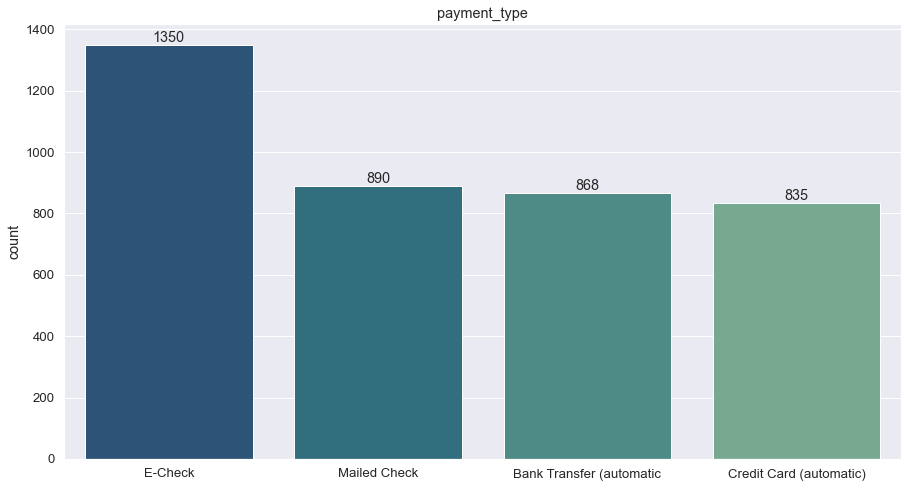

In [568]:
# plotting values by frequency (count)

plt.figure(figsize=(15, 8))
ax = sns.countplot(x = "payment_type", 
    data = payment_options,
    order = train["payment_type"].value_counts().index,
    palette = "crest_r")
    
ax.set(xlabel = None)
ax.bar_label(ax.containers[0])
plt.title("payment_type")

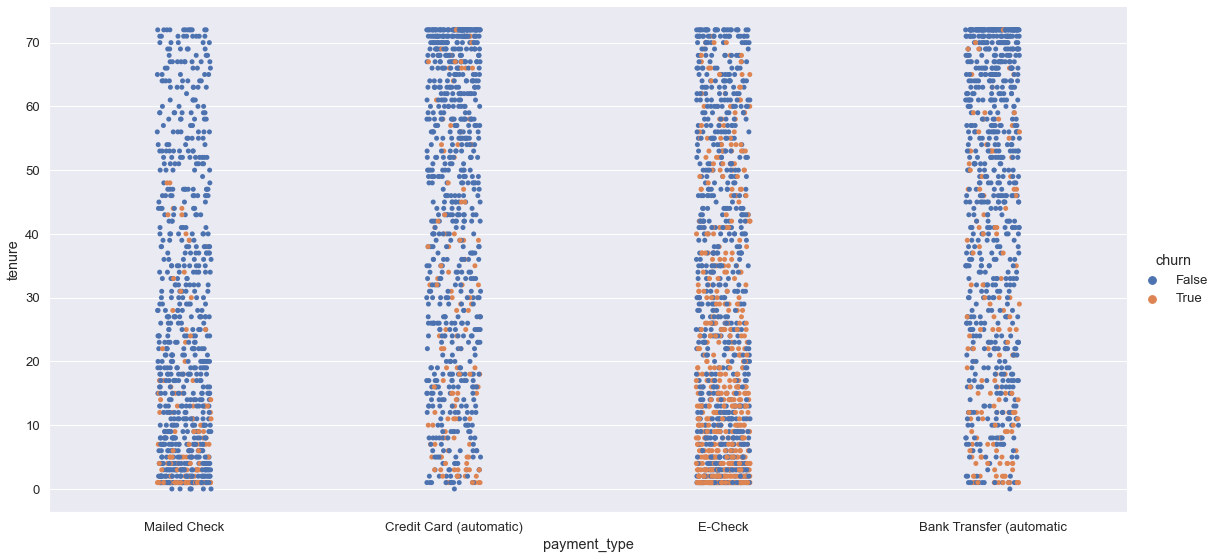

In [569]:
# scatter/sns.catplot for payment option by tenure and churn

sns.catplot(x = "payment_type", y = "tenure", data = payment_options, hue = "churn", height = 8, aspect = 2)

In [570]:
# creating an observation table of the dataframe

observed = pd.crosstab(index = payment_options["payment_type"], columns = payment_options["churn"], margins = True)
observed

churn,False,True,All
payment_type,,,
Bank Transfer (automatic,714,154,868
Credit Card (automatic),714,121,835
E-Check,739,611,1350
Mailed Check,730,160,890
All,2897,1046,3943


In [571]:
# running the ChiSquared Test

chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

In [572]:
print("\n","Observed Values:", "\n", observed.values)
print("-----","\n","Expected Values:", "\n", exp_values.astype(int))

print("-----","\n","chi2 = ", chi.round(2))
print("p_value =", p_value.round(5))
print("Degrees of Freedom =", degf)


 Observed Values: 
 [[ 714  154  868]
 [ 714  121  835]
 [ 739  611 1350]
 [ 730  160  890]
 [2897 1046 3943]]
----- 
 Expected Values: 
 [[ 637  230  868]
 [ 613  221  835]
 [ 991  358 1350]
 [ 653  236  890]
 [2897 1046 3943]]
----- 
 chi2 =  372.85
p_value = 0.0
Degrees of Freedom = 8


In [573]:
if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("Fail to reject Null Hypothesis.")

REJECT Null Hypothesis.


**Conclusion:**

1. Given the relatively low p-value in our ChiSquared Test - we can conclude with a 95% confidence interval in this dataset that there is an association/relationship between the current "payment type" options and a customer's decision to churn.
   
   *Payment Type Options:*
   
        - E-Check (electronic Check)

        - Bank Transfer (automatic payment option)

        - Credit Card (automatic payment option)

        - Mailed Check 

2. We will therefore carry this feature forward into future predictive modeling.

----

## 4. Does whether or not a customer “Streams Movies” impact their decision to churn?

<u>**Hypothesis Formulation (movie streaming):**</u>

$H_0$: "There is NO association/relationship between streaming movies and customers' decision to churn."

$H_a$: "There IS an association/relationship between streaming movies and customers' decision to churn."


$\alpha$: 0.05

----

In [574]:
alpha = 0.05

In [575]:
# creating new dataframe

stream_movies = train

In [576]:
# viewing feature options/values

stream_movies["streaming_movies"].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

In [577]:
stream_movies.shape

(3943, 62)

In [578]:
# generating summary statistics 

summary_stats = stream_movies.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
tenure,3943.0,32.531829,24.542655,0.0,9.000,29.00,56.000,72.0
monthly_charges,3943.0,65.119883,30.023920,18.4,38.175,70.60,90.050,118.6
total_charges,3943.0,2313.859067,2284.689172,18.8,402.725,1415.55,3840.675,8684.8


In [579]:
# creating a "range" column for this dataset

summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats

,count,mean,std,min,25%,50%,75%,max,range
tenure,3943.0,32.531829,24.542655,0.0,9.000,29.00,56.000,72.0,72.0
monthly_charges,3943.0,65.119883,30.023920,18.4,38.175,70.60,90.050,118.6,100.2
total_charges,3943.0,2313.859067,2284.689172,18.8,402.725,1415.55,3840.675,8684.8,8666.0


Text(0.5, 1.0, 'Streaming Movies')

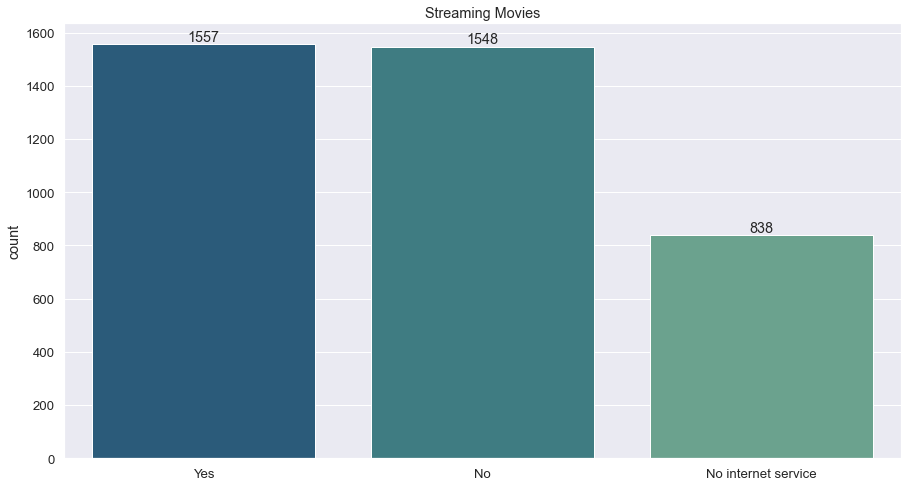

In [580]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x = "streaming_movies", 
    data = stream_movies,
    order = stream_movies["streaming_movies"].value_counts().index,
    palette = "crest_r")
 
ax.set(xlabel = None)
ax.bar_label(ax.containers[0])
plt.title("Streaming Movies")


# relatively similar numbers across customers who stream movies and those who dont 

In [581]:
# creating an observation table of the dataframe

observed = pd.crosstab(index = stream_movies["streaming_movies"], columns = stream_movies["churn"], margins = True)
observed

churn,False,True,All
streaming_movies,,,
No,1023,525,1548
No internet service,775,63,838
Yes,1099,458,1557
All,2897,1046,3943


In [582]:
# running the ChiSquared Test

chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

In [583]:
print("\n","Observed Values:", "\n", observed.values)
print("-----","\n","Expected Values:", "\n", exp_values.astype(int))

print("-----","\n","chi2 = ", chi.round(2))
print("p_value =", p_value.round(5))
print("Degrees of Freedom =", degf)


 Observed Values: 
 [[1023  525 1548]
 [ 775   63  838]
 [1099  458 1557]
 [2897 1046 3943]]
----- 
 Expected Values: 
 [[1137  410 1548]
 [ 615  222  838]
 [1143  413 1557]
 [2897 1046 3943]]
----- 
 chi2 =  205.37
p_value = 0.0
Degrees of Freedom = 6


In [584]:
if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("Fail to reject Null Hypothesis.")

REJECT Null Hypothesis.


**Conclusion:**

1. Given the relatively low p-value in our ChiSquared Test - we can conclude with a 95% confidence interval in this dataset that there is an association/relationship between the option to "Stream Movies" and a customer's decision to churn.
   
   *Streaming Movies Options:*
   
        - "Yes" (has internet and streams movies)
        - "No" (has internet but doesn't stream movies)
        - "No internet service" (can't stream movies)

2. We will therefore carry this feature forward into future predictive modeling.


-----
## Modeling Phase

In [585]:
# importing needed modules/functions for modeling phase

# modeling functions
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# data splitting
from sklearn.model_selection import train_test_split

# reporting
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# removing return/print warnings
import warnings
warnings.filterwarnings("ignore")

----
### Generating a baseline prediction

**<u>Notes:</u>**

- We are predicting customer "churn"

**Churn:**

False/0 = does not churn

True/1 = churned 

- True Positive: predict churn --> (actual) churned

- True Negative: predict did NOT churn --> (actual) did not churn

- False Positive: predict churn --> (actual) did not churn

- False Negative: predict did NOT churn --> (actual) churned 

----

In [586]:
# creating copiess of the initial data split
train_copy = train.copy()
validate_copy = validate.copy()
test_copy = test.copy()

print(f'Train Copy Shape: {train_copy.shape}')
print(f'Validate Copy Shape: {validate_copy.shape}')
print(f'Test Copy Shape: {test_copy.shape}')

Train Copy Shape: (3943, 62)
Validate Copy Shape: (1691, 62)
Test Copy Shape: (1409, 62)


In [587]:
# part 1: new dataframe with specified features for testing

train_features = model_features(train_copy)
validate_features = model_features(validate_copy)
test_features = model_features(test_copy)

In [588]:
# part 2: creating X and y modeling dataframes 

X_train = train_features.drop(columns=["churn"])
y_train = train_features.churn

X_validate = validate_features.drop(columns=["churn"])
y_validate = validate_features.churn

X_test = test_features.drop(columns=["churn"])
y_test = test_features.churn

In [589]:
# note: the model will also read boolean type (F/T) as either (0/1)

# False (did not churn):    2897 customers
# True (did churn):     1046 customers

train_copy.churn.value_counts()

False    2897
True     1046
Name: churn, dtype: int64

In [590]:
# baseline prediction = highest frequency outcome "does not churn" or False/0

train_copy["baseline_prediction"] = False
train_copy.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support_yes,streaming_tv_no,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no,streaming_movies_no_internet_service,streaming_movies_yes,paperless_billing_no,paperless_billing_yes,baseline_prediction
5657,No internet service,Mailed Check,Month-to-Month,1051-EQPZR,Female,False,Yes,Yes,44,Yes,...,False,False,True,False,False,True,False,True,False,False
3796,Fiber Optic,Credit Card (automatic),Month-to-Month,4450-DLLMH,Male,False,No,No,2,Yes,...,False,True,False,False,True,False,False,False,True,False
4566,Fiber Optic,Credit Card (automatic),Month-to-Month,6833-JMZYP,Female,False,No,No,15,Yes,...,False,False,False,True,False,False,True,False,True,False
2389,DSL,Mailed Check,One Year,9830-ECLEN,Male,False,Yes,Yes,58,No,...,False,False,False,True,True,False,False,True,False,False
2793,Fiber Optic,E-Check,Month-to-Month,1200-TUZHR,Female,True,No,No,8,Yes,...,False,True,False,False,False,False,True,True,False,False


In [591]:
train_copy[["churn", "baseline_prediction"]].dtypes

churn                  bool
baseline_prediction    bool
dtype: object

In [592]:
# baseline accuracy score: the total number of times that the baseline prediction matched the actual churn outcome
# baseline accuracy score: ~74.0% **(note that if the goal is to predict churn = 1, then baseline accuracy is ~26%)

baseline_acc = (train_copy["baseline_prediction"] == train_copy["churn"]).mean().round(3)
print(f"Baseline Accuracy: % {(baseline_acc * 100).round()}")

Baseline Accuracy: % 74.0


----

### <u>Prediction(s):</u>

Given the **<u>hypothesis testing in exploration</u>**, i conclude that:

* internet service
* payment type
* streaming movies and...
* tech support

are a better predictors of customer churn than the baseline.

In [593]:
with pd.option_context('display.max_rows', None):
    df = train_copy.reindex(sorted(train_copy.columns), axis =1)
    print(pd.Series(df.columns))

0                           baseline_prediction
1                                         churn
2                                 contract_type
3                  contract_type_month_to_month
4                        contract_type_one_year
5                        contract_type_two_year
6                                   customer_id
7                                    dependents
8                                 dependents_no
9                                dependents_yes
10                            device_protection
11                         device_protection_no
12        device_protection_no_internet_service
13                        device_protection_yes
14                                       gender
15                                gender_female
16                                  gender_male
17                        internet_service_type
18                    internet_service_type_dsl
19            internet_service_type_fiber_optic
20    internet_service_type_no_internet_

----
### Decision Tree: Model 01

In [594]:
# analyzing the data

X_train.head()

,internet_service_type_fiber_optic,internet_service_type_dsl,internet_service_type_no_internet_service,payment_type_credit_card_automatic,payment_type_e_check,payment_type_mailed_check,payment_type_bank_transfer_automatic,streaming_movies_no_internet_service,streaming_movies_yes,streaming_movies_no,tech_support_no_internet_service,tech_support_yes,tech_support_no
5657,False,False,True,False,False,True,False,True,False,False,True,False,False
3796,True,False,False,True,False,False,False,False,False,True,False,False,True
4566,True,False,False,True,False,False,False,False,True,False,False,False,True
2389,False,True,False,False,False,True,False,False,False,True,False,False,True
2793,True,False,False,False,True,False,False,False,True,False,False,False,True


In [595]:
X_train.shape

(3943, 13)

In [596]:
# samples of churn

y_train.head()

5657    False
3796    False
4566    False
2389    False
2793    False
Name: churn, dtype: bool

In [597]:
# churn by the numbers:

y_train.value_counts()

False    2897
True     1046
Name: churn, dtype: int64

In [598]:
# creating the first decision tree

tree1 = DecisionTreeClassifier(max_depth = 3, random_state = 3)

In [599]:
# fitting the decision tree with "in-sample" train data

tree1 = tree1.fit(X_train, y_train)

In [600]:
# generating the model predictions:

y_predictions = tree1.predict(X_train)

In [601]:
# viewing predictions sample:

y_predictions[0:51]

array([False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False, False,
        True, False,  True, False, False,  True, False,  True, False,
       False, False, False, False, False, False])

In [602]:
# generating my own confusion matrix

pd.crosstab(index = y_predictions, columns = y_train, margins = True)

churn,False,True,All
row_0,,,
False,2595,614,3209
True,302,432,734
All,2897,1046,3943


In [603]:
# understanding the confusion matrix further:

TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

print(f'True Negative: {TN}')
print(f'False Positive: {FP}')
print(f'False Negative: {FN}')
print(f'True Positive: {TP}')

True Negative: 2595
False Positive: 302
False Negative: 614
True Positive: 432


In [604]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)

false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)

support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy.round(2)}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate.round(2)}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate.round(2)}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate.round(2)}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate.round(2)}", '\n')
print(f"Precision/PPV: {precision.round(2)}", '\n')
print(f"F1 Score: {f1_score.round(2)}", '\n')
print(f"Support (0): {support_neg.round(2)}", '\n')
print(f"Support (1): {support_pos.round(2)}")

Accuracy: 0.77 

True Positive Rate/Sensitivity/Recall/Power: 0.41 

False Positive Rate/False Alarm Ratio/Fall-out: 0.1 

True Negative Rate/Specificity/Selectivity: 0.9 

False Negative Rate/Miss Rate: 0.59 

Precision/PPV: 0.59 

F1 Score: 0.49 

Support (0): 2897 

Support (1): 1046


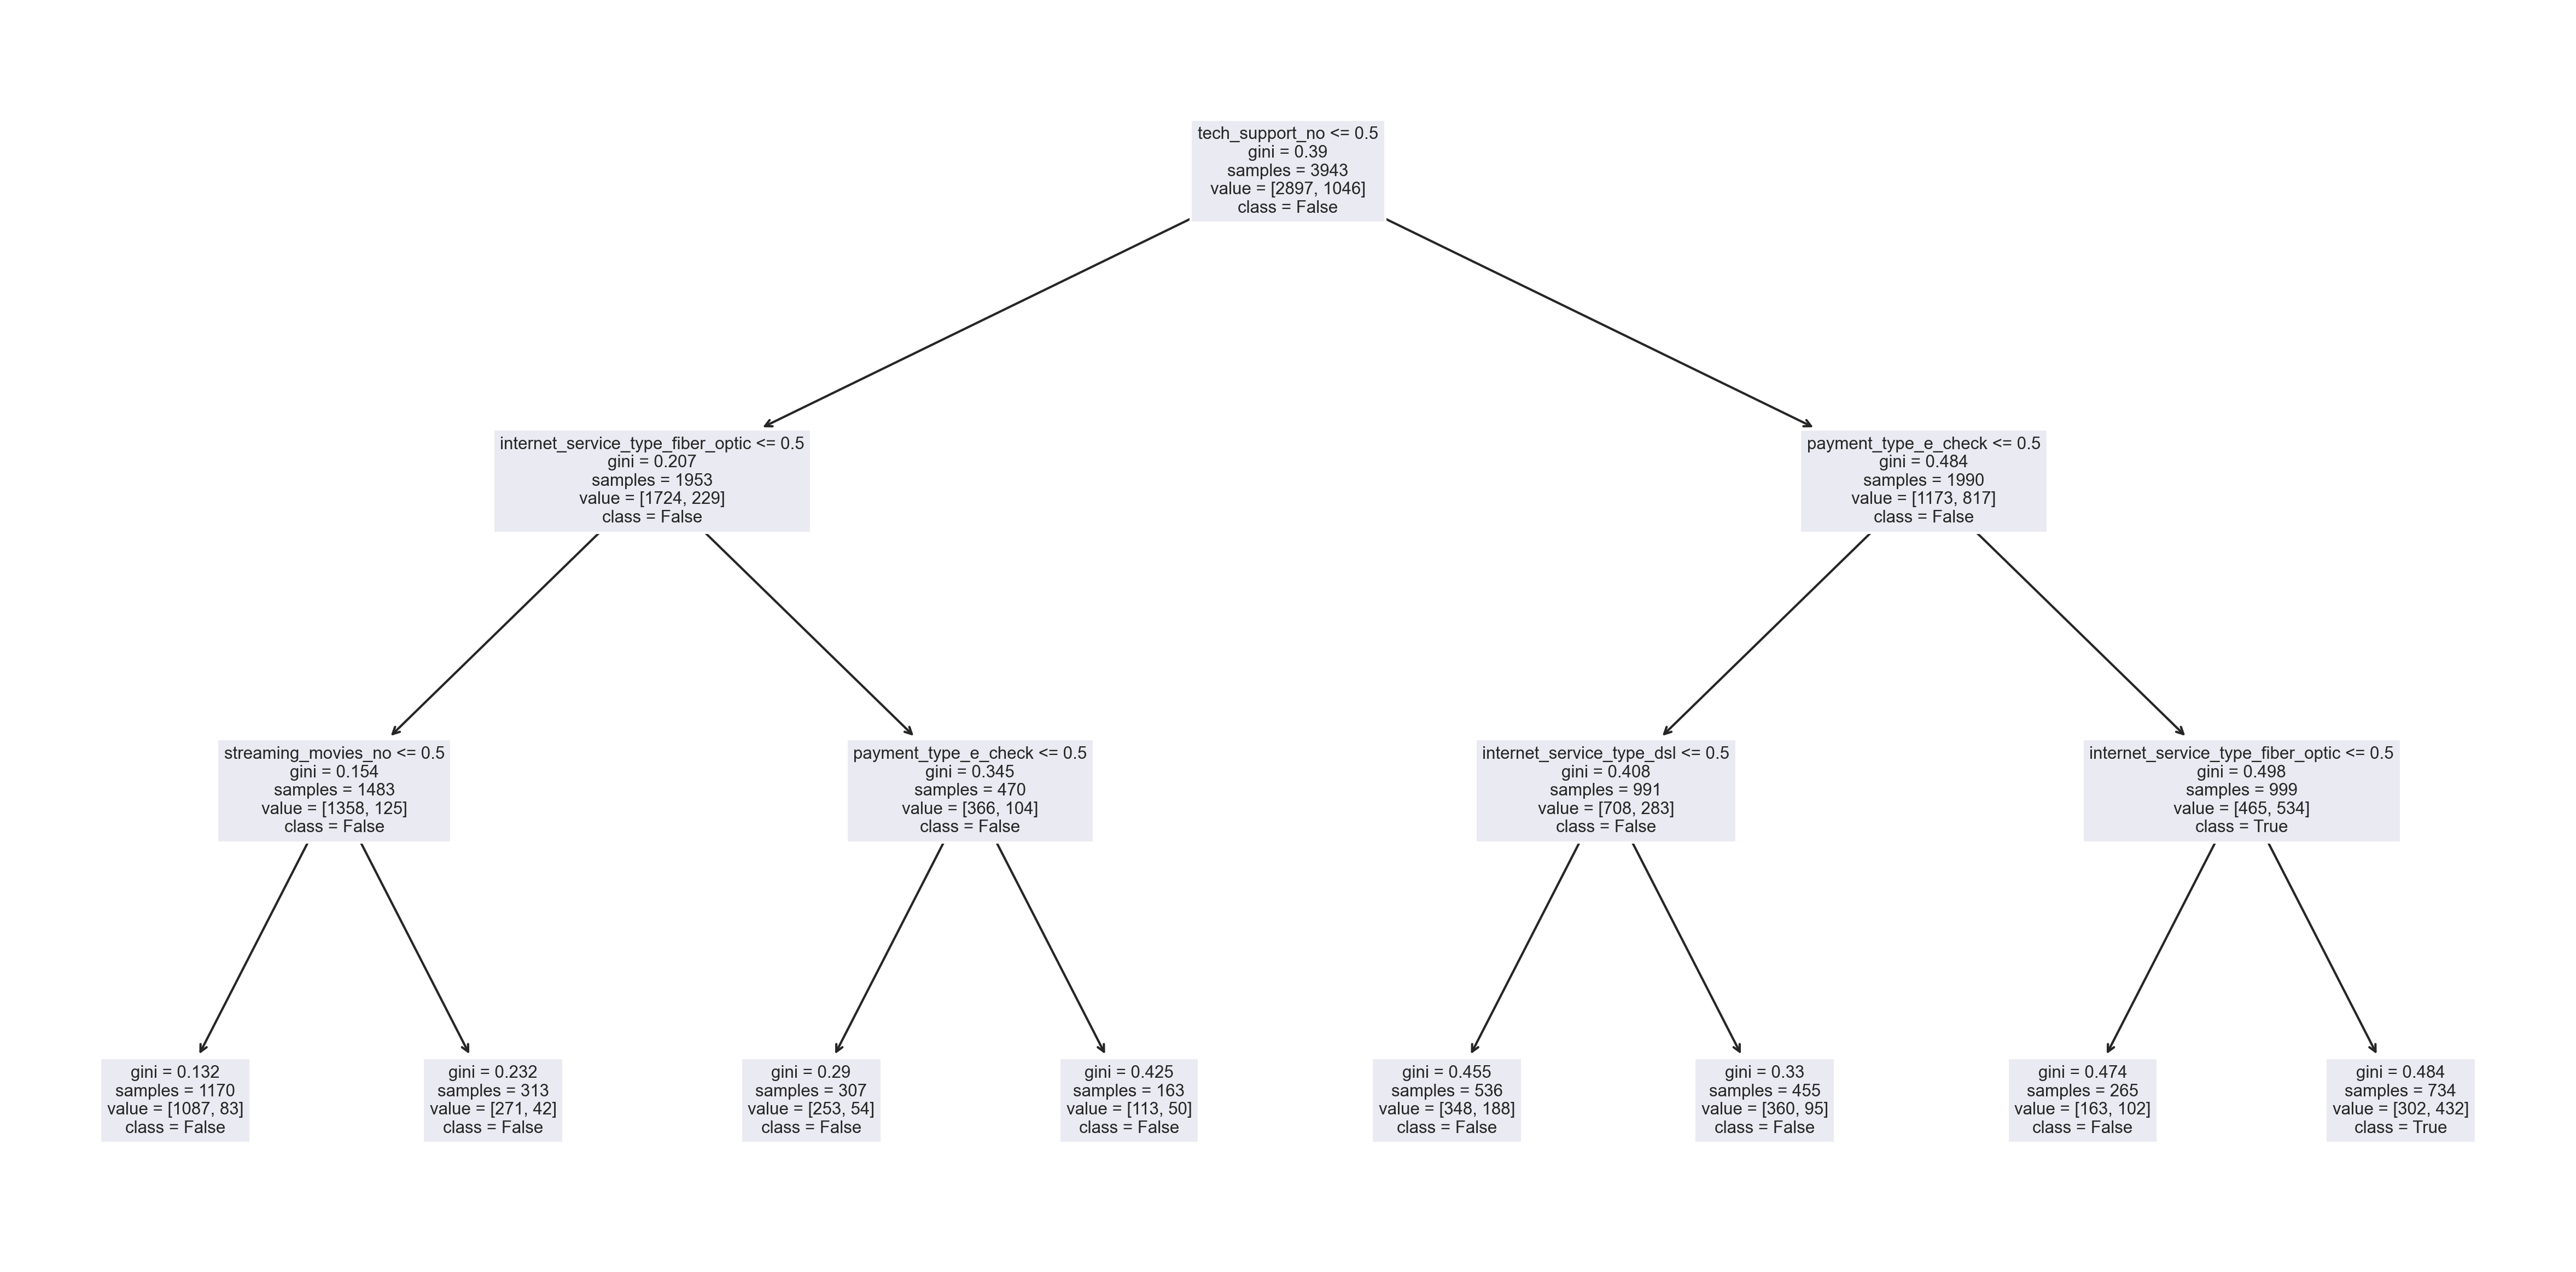

In [605]:
# plotting the decision tree

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

plt.figure(figsize=(20, 10))
plot_tree(tree1, feature_names = X_train.columns.astype("str"), class_names = y_train.unique().astype("str"))
plt.show()

In [606]:
# using a for loop method to create classification reports for all decision tree depths from range 1-15

for i in range(1, 16):
    # Making the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fitting the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Using the model
    # We'll evaluate the model's performance on train, first:
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of: {i}")
    print(pd.DataFrame(report))

    print() # printing a indented line for ea. iteration

Tree with max depth of: 1
                 False    True  accuracy    macro avg  weighted avg
precision     0.734720     0.0   0.73472     0.367360      0.539813
recall        1.000000     0.0   0.73472     0.500000      0.734720
f1-score      0.847076     0.0   0.73472     0.423538      0.622363
support    2897.000000  1046.0   0.73472  3943.000000   3943.000000

Tree with max depth of: 2
                 False         True  accuracy    macro avg  weighted avg
precision     0.826087     0.534535  0.752219     0.680311      0.748744
recall        0.839489     0.510516  0.752219     0.675003      0.752219
f1-score      0.832734     0.522249  0.752219     0.677492      0.750369
support    2897.000000  1046.000000  0.752219  3943.000000   3943.000000

Tree with max depth of: 3
                 False         True  accuracy    macro avg  weighted avg
precision     0.808663     0.588556   0.76769     0.698609      0.750273
recall        0.895754     0.413002   0.76769     0.654378      0.767

In [607]:
# evaluating the initial decision tree1 performance where best decision tree depth max for f1-score/accuracy is: 3

decision_tree_acc = tree1.score(X_train, y_train)

print('Accuracy of Decision Tree Classifer on training dataset: {:.2f}'.format(tree1.score(X_train, y_train)))
print(f'Absolute % Difference (Baseline vs. Decision Tree Model): % {round(baseline_acc - decision_tree_acc, 2)*100}')

Accuracy of Decision Tree Classifer on training dataset: 0.77
Absolute % Difference (Baseline vs. Decision Tree Model): % -3.0


----- 

### Random Forest: Model 02

In [608]:
# generating the first random forest model

rf1 = RandomForestClassifier(min_samples_leaf = 1, max_depth = 3, random_state = 123)

In [609]:
type(rf1)

sklearn.ensemble._forest.RandomForestClassifier

In [610]:
# fitting the initial random forest model with in-sample data:

rf1 = rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=123)

In [611]:
# understanding the importance of ea. feature input in the model

pd.Series(rf1.feature_importances_)

0     0.191177
1     0.062833
2     0.080237
3     0.038196
4     0.148325
5     0.003776
6     0.013893
7     0.036492
8     0.002798
9     0.011021
10    0.060801
11    0.091370
12    0.259080
dtype: float64

<AxesSubplot:>

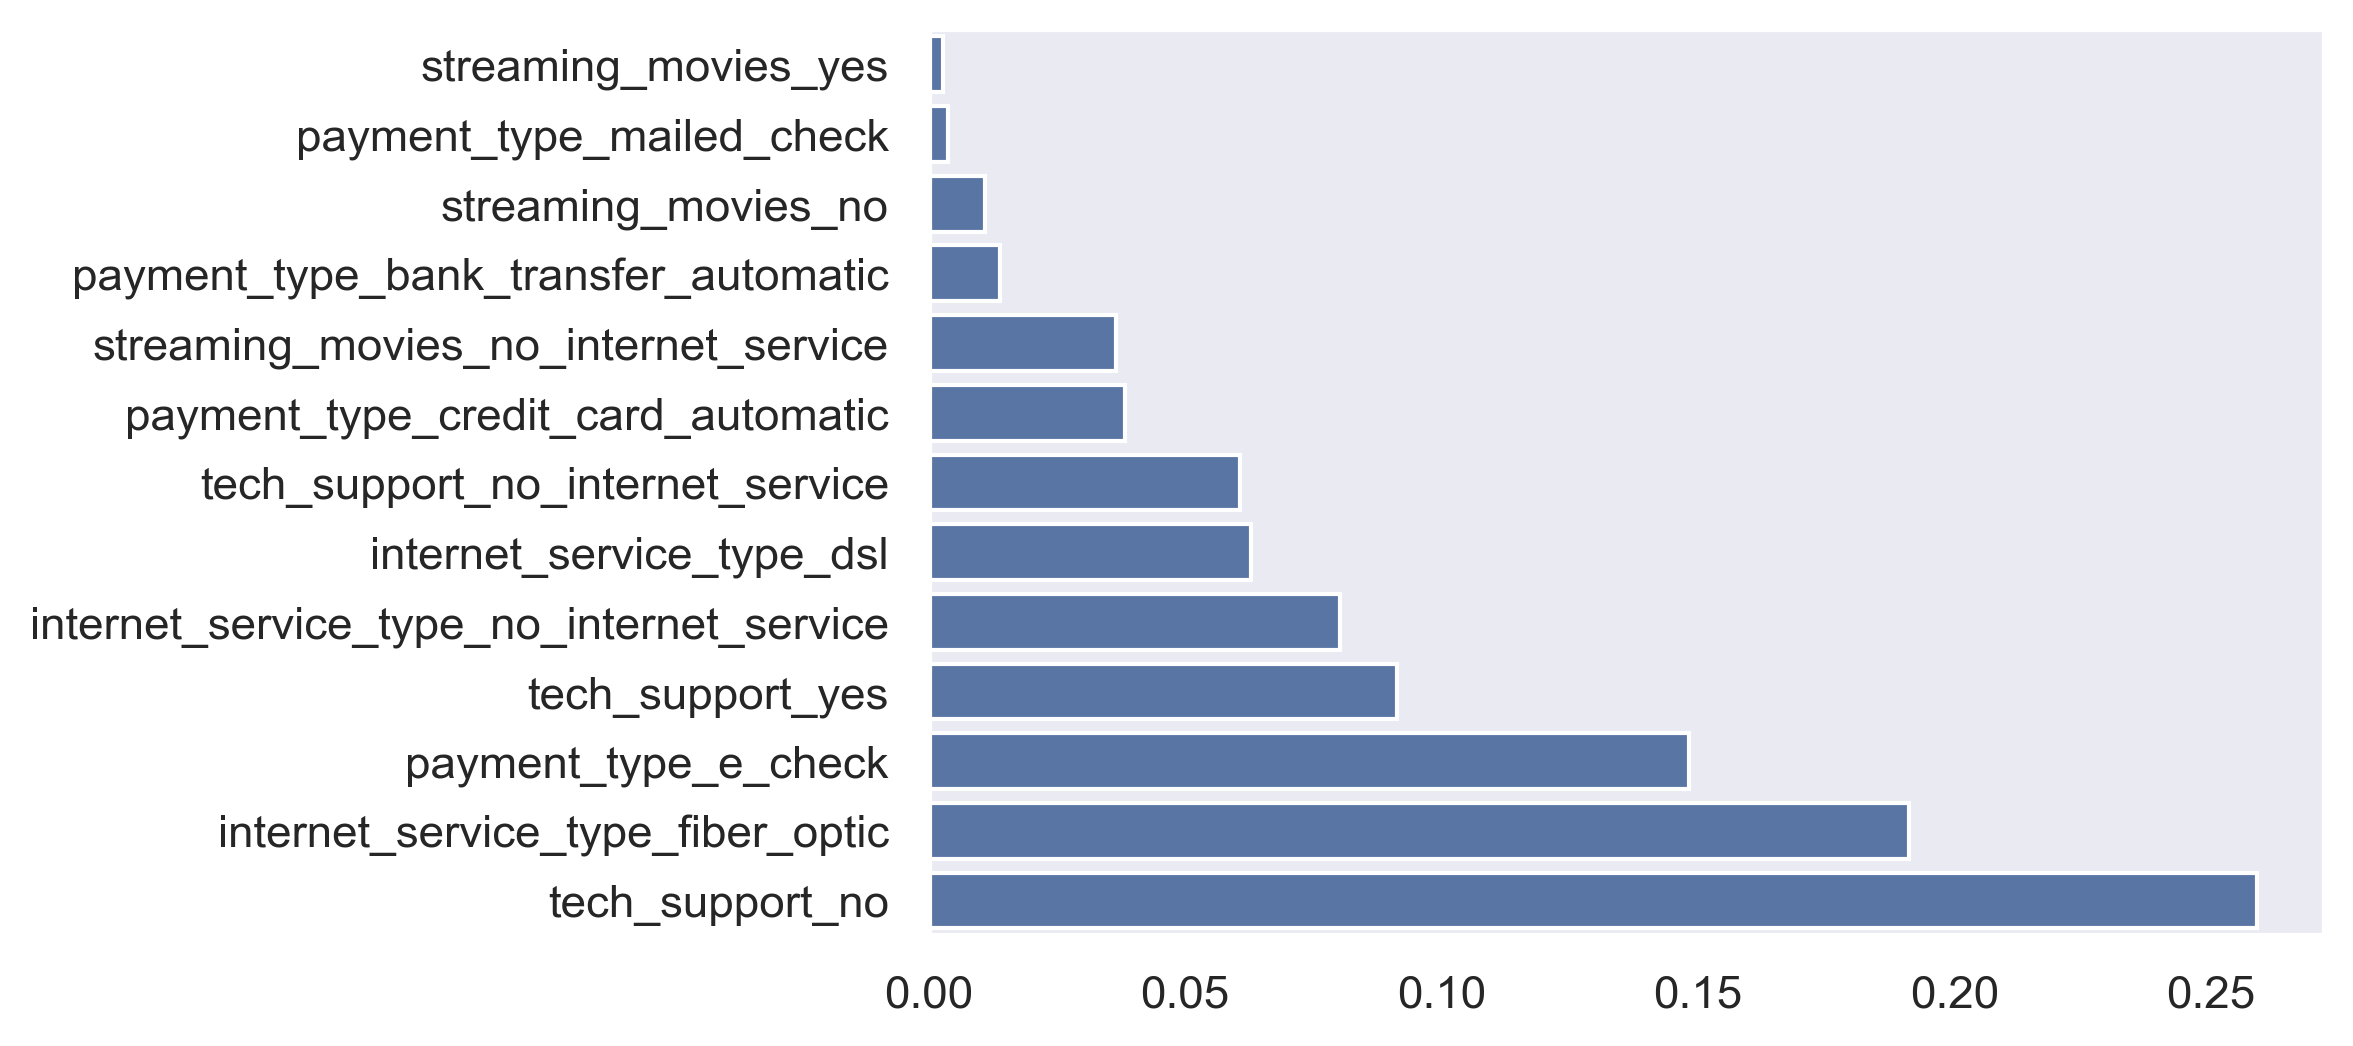

In [612]:
# by name plot of feature importance

sorted_idx = rf1.feature_importances_.argsort()
sns.set_theme(style = "dark")
sns.barplot(rf1.feature_importances_[sorted_idx], X_train.columns[sorted_idx], orient = "h", color = "b")

In [613]:
# sample of random forest model predictions:

y_predictions = rf1.predict(X_train)
y_predictions[0:51]

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [614]:
# estimating the probability of ea. customer churn outcome (does not churn / churns)
# it's my understanding from these estimates that there is not a lot of "variability" when determining that a customer does churn vs. when they do not

y_prediction_probability = rf1.predict_proba(X_train)
y_prediction_probability[0:51]

array([[0.91748564, 0.08251436],
       [0.65122268, 0.34877732],
       [0.65071266, 0.34928734],
       [0.71308315, 0.28691685],
       [0.50447416, 0.49552584],
       [0.61265962, 0.38734038],
       [0.65071266, 0.34928734],
       [0.80673898, 0.19326102],
       [0.80750242, 0.19249758],
       [0.86896469, 0.13103531],
       [0.93606101, 0.06393899],
       [0.80750242, 0.19249758],
       [0.48767089, 0.51232911],
       [0.79034386, 0.20965614],
       [0.91748564, 0.08251436],
       [0.79481826, 0.20518174],
       [0.48767089, 0.51232911],
       [0.75010357, 0.24989643],
       [0.80613035, 0.19386965],
       [0.65071266, 0.34928734],
       [0.87861765, 0.12138235],
       [0.71308315, 0.28691685],
       [0.71308315, 0.28691685],
       [0.69129683, 0.30870317],
       [0.93606101, 0.06393899],
       [0.86003937, 0.13996063],
       [0.80613035, 0.19386965],
       [0.58475168, 0.41524832],
       [0.48767089, 0.51232911],
       [0.93606101, 0.06393899],
       [0.

In [615]:
# random forest tree confusion matrix
# crosstab method

pd.crosstab(y_predictions, y_train)

churn,False,True
row_0,,
False,2767,832
True,130,214


In [616]:
# understanding the confusion matrix further:

TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

print(f'True Negative: {TN}')
print(f'False Positive: {FP}')
print(f'False Negative: {FN}')
print(f'True Positive: {TP}')

True Negative: 2767
False Positive: 130
False Negative: 832
True Positive: 214


In [617]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)

false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)

support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy.round(2)}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate.round(2)}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate.round(2)}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate.round(2)}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate.round(2)}", '\n')
print(f"Precision/PPV: {precision.round(2)}", '\n')
print(f"F1 Score: {f1_score.round(2)}", '\n')
print(f"Support (0): {support_neg.round(2)}", '\n')
print(f"Support (1): {support_pos.round(2)}")

Accuracy: 0.76 

True Positive Rate/Sensitivity/Recall/Power: 0.2 

False Positive Rate/False Alarm Ratio/Fall-out: 0.04 

True Negative Rate/Specificity/Selectivity: 0.96 

False Negative Rate/Miss Rate: 0.8 

Precision/PPV: 0.62 

F1 Score: 0.31 

Support (0): 2897 

Support (1): 1046


In [618]:
leaf_counter = 0

for i in range(10, 0, -1):
    # Make the model
    rf = RandomForestClassifier(max_depth=i, min_samples_leaf = (leaf_counter + 1), random_state=123)
    leaf_counter += 1

    # Fit the model (on train and only train)
    rf = rf.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = rf.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Random Forest with max_depth of: {i}")
    print(f"Random Forest with minimum sample leaves of: {leaf_counter}")
    print(pd.DataFrame(report))
    
    print()

Random Forest with max_depth of: 10
Random Forest with minimum sample leaves of: 1
                 False         True  accuracy    macro avg  weighted avg
precision     0.808663     0.588556   0.76769     0.698609      0.750273
recall        0.895754     0.413002   0.76769     0.654378      0.767690
f1-score      0.849984     0.485393   0.76769     0.667688      0.753265
support    2897.000000  1046.000000   0.76769  3943.000000   3943.000000

Random Forest with max_depth of: 9
Random Forest with minimum sample leaves of: 2
                 False         True  accuracy    macro avg  weighted avg
precision     0.808663     0.588556   0.76769     0.698609      0.750273
recall        0.895754     0.413002   0.76769     0.654378      0.767690
f1-score      0.849984     0.485393   0.76769     0.667688      0.753265
support    2897.000000  1046.000000   0.76769  3943.000000   3943.000000

Random Forest with max_depth of: 8
Random Forest with minimum sample leaves of: 3
                 Fals

In [619]:
leaf_counter = 0

for i in range(1, 11):
    # Make the model
    rf = RandomForestClassifier(max_depth=i, min_samples_leaf = (leaf_counter + 1), random_state=123)
    leaf_counter += 1

    # Fit the model (on train and only train)
    rf = rf.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = rf.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Random Forest with max_depth of: {i}")
    print(f"Random Forest with minimum sample leaves of: {leaf_counter}")
    print(pd.DataFrame(report))
    
    print()

Random Forest with max_depth of: 1
Random Forest with minimum sample leaves of: 1
                 False    True  accuracy    macro avg  weighted avg
precision     0.734720     0.0   0.73472     0.367360      0.539813
recall        1.000000     0.0   0.73472     0.500000      0.734720
f1-score      0.847076     0.0   0.73472     0.423538      0.622363
support    2897.000000  1046.0   0.73472  3943.000000   3943.000000

Random Forest with max_depth of: 2
Random Forest with minimum sample leaves of: 2
                 False    True  accuracy    macro avg  weighted avg
precision     0.734720     0.0   0.73472     0.367360      0.539813
recall        1.000000     0.0   0.73472     0.500000      0.734720
f1-score      0.847076     0.0   0.73472     0.423538      0.622363
support    2897.000000  1046.0   0.73472  3943.000000   3943.000000

Random Forest with max_depth of: 3
Random Forest with minimum sample leaves of: 3
                 False         True  accuracy    macro avg  weighted avg

In [620]:
# evaluating the random forest model with
# number of sample leaves: 1
# max depth: 10

random_forest_acc = rf1.score(X_train, y_train)

print('Accuracy of Decision Tree Classifer on training dataset: {:.2f}'.format(random_forest_acc))
print(f'Absolute % Difference (Baseline vs. Random Forest Model): % {round(baseline_acc - random_forest_acc, 2)*100}')

Accuracy of Decision Tree Classifer on training dataset: 0.76
Absolute % Difference (Baseline vs. Random Forest Model): % -2.0


----
### K-nearest Neighbor "KNN": Model 03

In [621]:
print(f'In-sample Dataset: {X_train.shape}')
print(f'Total Number of Actual Outcomes in Training Dataset: {y_train.shape[0]}')

In-sample Dataset: (3943, 13)
Total Number of Actual Outcomes in Training Dataset: 3943


In [622]:
# generating the "KNN" model

knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [623]:
# verifying the type of knn1

type(knn1)

sklearn.neighbors._classification.KNeighborsClassifier

In [624]:
# fitting the KNN model

knn1 = knn1.fit(X_train, y_train)

In [625]:
# sample of KNN predictions

y_predictions = knn1.predict(X_train)
y_predictions[:51]

array([False, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True,  True, False,
        True, False, False, False, False,  True, False,  True,  True,
       False,  True, False, False, False,  True])

In [626]:
# generating confusion matrix using pd.crosstab
# index = predicted outcomes
# columns = actual outcomes

pd.crosstab(y_predictions, y_train)

churn,False,True
row_0,,
False,2410,650
True,487,396


In [627]:
# understanding the confusion matrix further:

TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

print(f'True Negative: {TN}')
print(f'False Positive: {FP}')
print(f'False Negative: {FN}')
print(f'True Positive: {TP}')

True Negative: 2410
False Positive: 487
False Negative: 650
True Positive: 396


In [628]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)

false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)

support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy.round(2)}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate.round(2)}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate.round(2)}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate.round(2)}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate.round(2)}", '\n')
print(f"Precision/PPV: {precision.round(2)}", '\n')
print(f"F1 Score: {f1_score.round(2)}", '\n')
print(f"Support (0): {support_neg.round(2)}", '\n')
print(f"Support (1): {support_pos.round(2)}")

Accuracy: 0.71 

True Positive Rate/Sensitivity/Recall/Power: 0.38 

False Positive Rate/False Alarm Ratio/Fall-out: 0.17 

True Negative Rate/Specificity/Selectivity: 0.83 

False Negative Rate/Miss Rate: 0.62 

Precision/PPV: 0.45 

F1 Score: 0.41 

Support (0): 2897 

Support (1): 1046


In [629]:
# using for loops to create classification reports for all KNN number of n_neighbors in range 1-15:

for k in range(1, 30):
    # Making the model
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')

    # Fitting the model (on train and only train data)
    knn = knn.fit(X_train, y_train)

    # Using the model
    # We'll evaluate the model's performance on train, first:
    y_predictions = knn.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"KNN Model with # of nearest neighbors: {k}")
    print(pd.DataFrame(report))

    print() # printing a indented line for ea. iteration

KNN Model with # of nearest neighbors: 1
                 False         True  accuracy    macro avg  weighted avg
precision     0.744771     0.300113  0.645194     0.522442      0.626812
recall        0.786676     0.253346  0.645194     0.520011      0.645194
f1-score      0.765150     0.274754  0.645194     0.519952      0.635058
support    2897.000000  1046.000000  0.645194  3943.000000   3943.000000

KNN Model with # of nearest neighbors: 2
                 False         True  accuracy    macro avg  weighted avg
precision     0.746055     0.351528  0.700228     0.548791      0.641395
recall        0.897480     0.153920  0.700228     0.525700      0.700228
f1-score      0.814792     0.214096  0.700228     0.514444      0.655439
support    2897.000000  1046.000000  0.700228  3943.000000   3943.000000

KNN Model with # of nearest neighbors: 3
                 False         True  accuracy    macro avg  weighted avg
precision     0.741095     0.300664  0.673852     0.520880      0.624258

In [630]:
# conclusion -- 
# given the for loop, i conclude that our best model accuracy is where n_neighbors = 20 and weights = uniform
# given this observation, i will tweak our model to reflect these hyper-parameters for potentially better performance with out-sample data

In [631]:
knn2 = KNeighborsClassifier(n_neighbors = 20, weights = "uniform")
knn2 = knn2.fit(X_train, y_train)
y_predictions = knn2.predict(X_train)

print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

       False       0.77      0.93      0.84      2897
        True       0.54      0.24      0.33      1046

    accuracy                           0.75      3943
   macro avg       0.66      0.58      0.59      3943
weighted avg       0.71      0.75      0.71      3943



In [632]:
# calculating the KNN accuracy given:
# n_neighbors = 20
# weights = "uniform"

knn_acc = knn2.score(X_train, y_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn2.score(X_train, y_train)))
print(f'Absolute % Difference (Baseline vs. KNN Model): % {round(baseline_acc - random_forest_acc, 2)*100}')     

Accuracy of KNN classifier on training set: 0.75
Absolute % Difference (Baseline vs. KNN Model): % -2.0


----
### Logistical Regression: Model 04

In [633]:
print(f'In-sample Dataset: {X_train.shape}')
print(f'Total Number of Actual Outcomes in Training Dataset: {y_train.shape[0]}')

In-sample Dataset: (3943, 13)
Total Number of Actual Outcomes in Training Dataset: 3943


In [634]:
# generating the logistic regression model

logit1 = LogisticRegression(random_state=123)
logit2 = LogisticRegression(random_state=123)
logit3 = LogisticRegression(random_state=123)
logit4 = LogisticRegression(random_state=123)
logit5 = LogisticRegression(random_state=123)
logit6 = LogisticRegression(random_state=123)

In [635]:
# specify the features we're using

features01 = [ 
    'internet_service_type_fiber_optic', \
    'internet_service_type_dsl', \
    'internet_service_type_no_internet_service', \
    'payment_type_credit_card_automatic', \
    'payment_type_e_check', \
    'payment_type_mailed_check', \
    'payment_type_bank_transfer_automatic', \
    'streaming_movies_no_internet_service', \
    'streaming_movies_yes', \
    'streaming_movies_no',
    'tech_support_no_internet_service', \
    'tech_support_yes', \
    'tech_support_no']

# only internet service options
features02 = [ 
    'internet_service_type_fiber_optic', \
    'internet_service_type_dsl', \
    'internet_service_type_no_internet_service']

# only payment type options
features03 = ['payment_type_credit_card_automatic', \
    'payment_type_e_check', \
    'payment_type_mailed_check', \
    'payment_type_bank_transfer_automatic']

# only streaming movies options
features04 = ['streaming_movies_no_internet_service', \
    'streaming_movies_yes', \
    'streaming_movies_no']

# only tech support options
features05 = ['tech_support_no_internet_service', \
    'tech_support_yes', \
    'tech_support_no']

# internet and payment options -- 
features06 = ['payment_type_credit_card_automatic', \
    'payment_type_e_check', \
    'payment_type_mailed_check', \
    'payment_type_bank_transfer_automatic', \
    'internet_service_type_fiber_optic', \
    'internet_service_type_dsl', \
    'internet_service_type_no_internet_service']

In [636]:
# fitting the model using specified features above

logit1 = logit1.fit(X_train[features01], y_train)
logit2 = logit2.fit(X_train[features02], y_train)
logit3 = logit3.fit(X_train[features03], y_train)
logit4 = logit4.fit(X_train[features04], y_train)
logit5 = logit5.fit(X_train[features05], y_train)
logit6 = logit6.fit(X_train[features06], y_train)

In [637]:
# generating predictions based on the logit model

y_predictions01 = logit1.predict(X_train[features01])
y_predictions02 = logit2.predict(X_train[features02])
y_predictions03 = logit3.predict(X_train[features03])
y_predictions04 = logit4.predict(X_train[features04])
y_predictions05 = logit5.predict(X_train[features05])
y_predictions06 = logit6.predict(X_train[features06])

In [638]:

logit_acc01 = logit1.score(X_train[features01], y_train)
logit_acc02 = logit2.score(X_train[features02], y_train)
logit_acc03 = logit3.score(X_train[features03], y_train)
logit_acc04 = logit4.score(X_train[features04], y_train)
logit_acc05 = logit5.score(X_train[features05], y_train)
logit_acc06 = logit6.score(X_train[features06], y_train)


print('Accuracy of Logistic Regression classifier on training set (all features): {:.2f}'.format(logit_acc01))
print('Accuracy of Logistic Regression classifier on training set (internet only): {:.2f}'.format(logit_acc02))
print('Accuracy of Logistic Regression classifier on training set (payment type only): {:.2f}'.format(logit_acc03))
print('Accuracy of Logistic Regression classifier on training set (streaming movies only): {:.2f}'.format(logit_acc04))
print('Accuracy of Logistic Regression classifier on training set (tech support only): {:.2f}'.format(logit_acc05))
print('Accuracy of Logistic Regression classifier on training set (internet and payment options): {:.2f}'.format(logit_acc06), "\n")
print(f'Absolute % Difference (Baseline vs. Logistical Regression Model 01): % {round(baseline_acc - logit_acc01, 2)*100}') 

Accuracy of Logistic Regression classifier on training set (all features): 0.77
Accuracy of Logistic Regression classifier on training set (internet only): 0.73
Accuracy of Logistic Regression classifier on training set (payment type only): 0.73
Accuracy of Logistic Regression classifier on training set (streaming movies only): 0.73
Accuracy of Logistic Regression classifier on training set (tech support only): 0.73
Accuracy of Logistic Regression classifier on training set (internet and payment options): 0.75 

Absolute % Difference (Baseline vs. Logistical Regression Model 01): % -3.0


----
### Evaluating Models on Out-of-Sample Dataset:

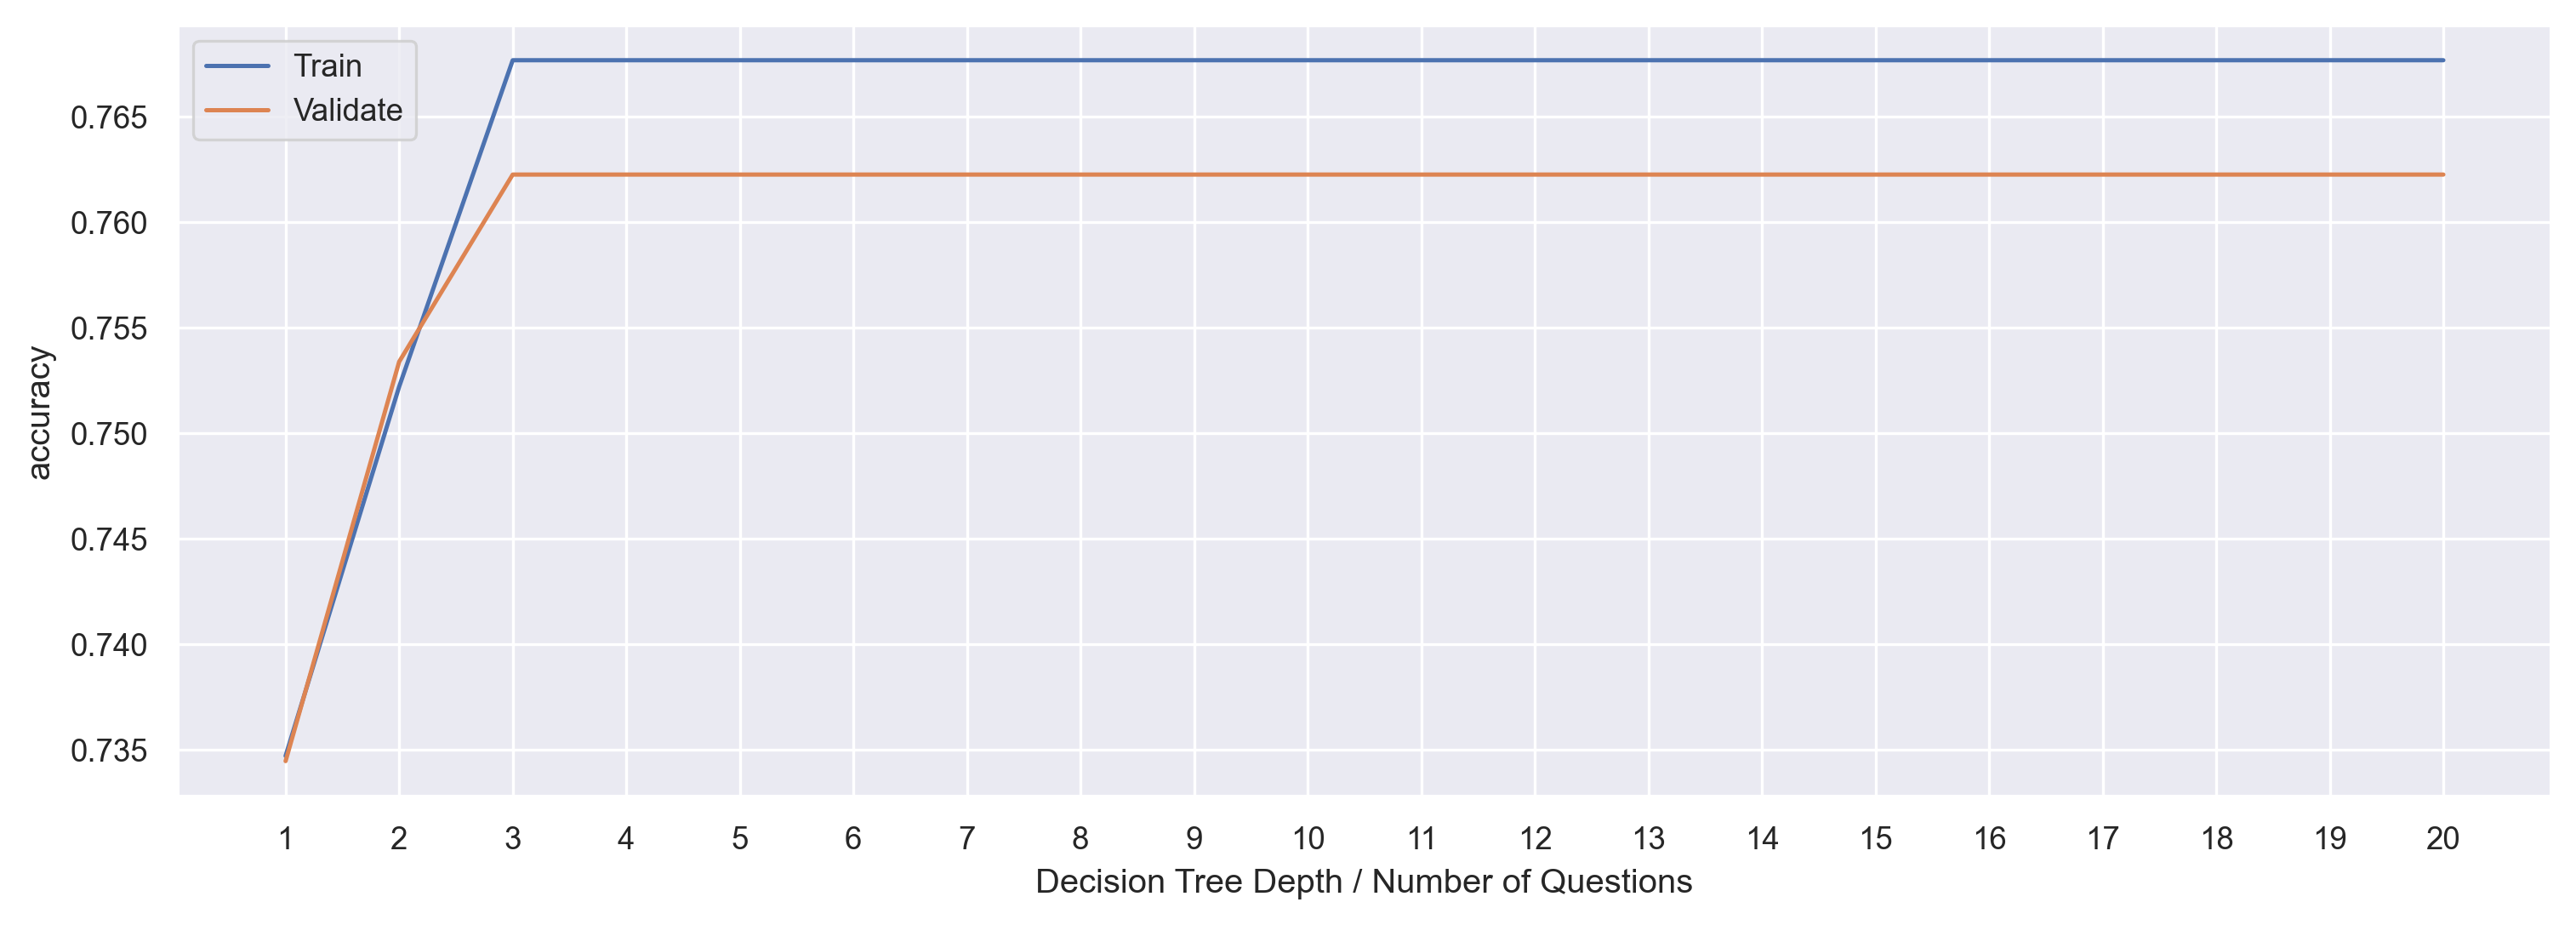

In [639]:
# plotting the "Decision Tree" comparison across in-sample and out-sample datasets:

sns.set_theme("paper")

i_range = range(1, 21)
train_scores = []
validate_scores = []

for i in i_range:
    tree = DecisionTreeClassifier(max_depth = i)
    tree.fit(X_train, y_train)
    train_scores.append(tree.score(X_train, y_train))
    validate_scores.append(tree.score(X_validate, y_validate))
plt.figure(figsize=(12, 4))
plt.xlabel('Decision Tree Depth / Number of Questions')
plt.ylabel('accuracy')
plt.plot(i_range, train_scores, label='Train')
plt.plot(i_range, validate_scores, label='Validate')
plt.legend()
plt.xticks(i_range)
plt.show()

In [640]:
metrics = []

for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth = i)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i, \
        "train_accuracy": in_sample_accuracy, \
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.train_accuracy)
df.round(2)

,max_depth,train_accuracy,validate_accuracy,percent_change_diff
0,1,0.73,0.73,0.00
1,2,0.75,0.75,-0.00
2,3,0.77,0.76,0.01
3,4,0.77,0.76,0.01
4,5,0.77,0.76,0.01
5,6,0.77,0.76,0.01
6,7,0.77,0.76,0.01
7,8,0.77,0.76,0.01
8,9,0.77,0.76,0.01
9,10,0.77,0.76,0.01


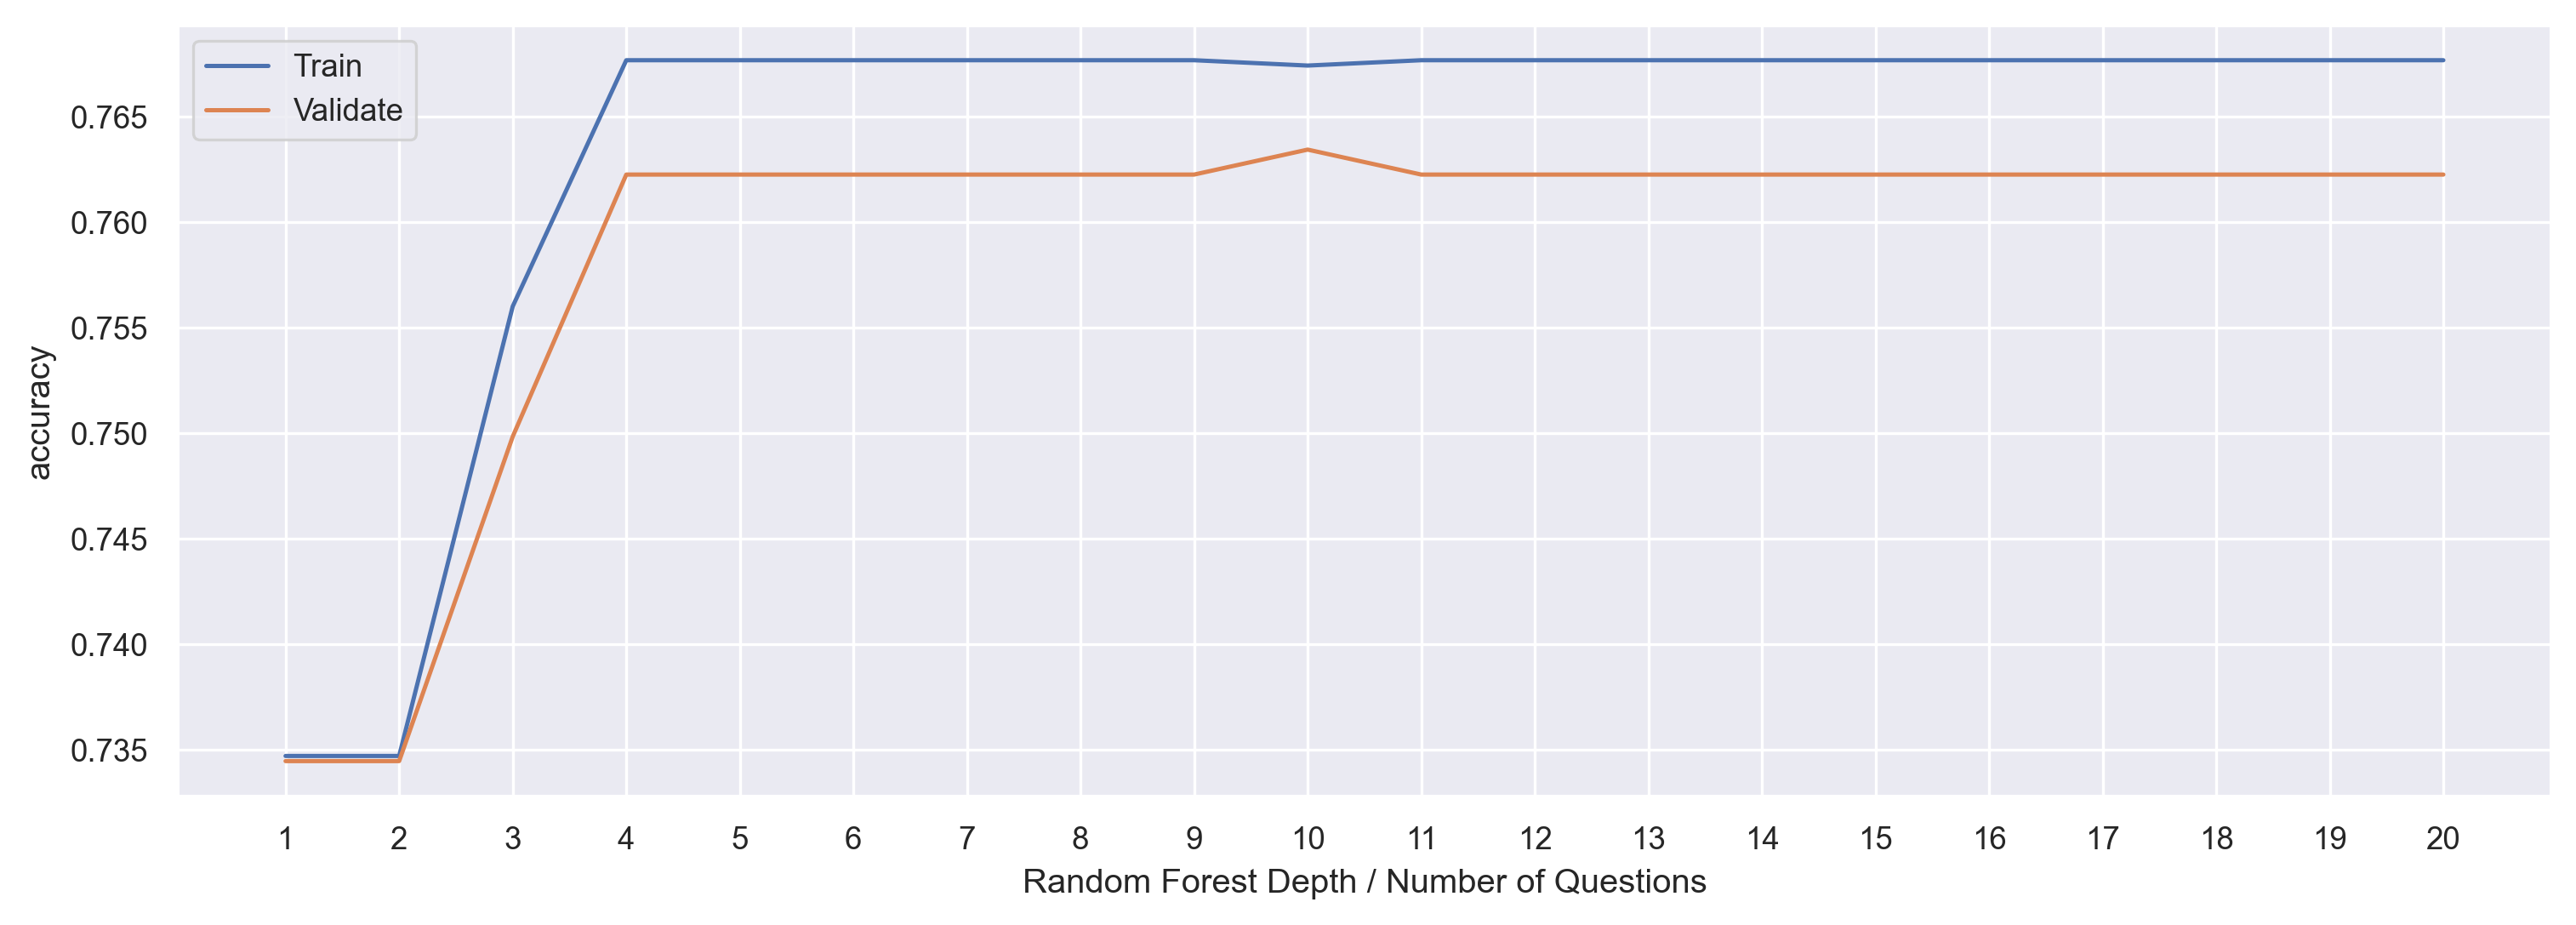

In [641]:
# plotting the "Random Forest" comparison across in-sample and out-sample datasets:

sns.set_theme("paper")

i_range = range(1, 21)
train_scores = []
validate_scores = []
leaf_counter = 0

for i in i_range:
    rf = RandomForestClassifier(min_samples_leaf = (leaf_counter + 1), max_depth = i)
    leaf_counter += 1
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    validate_scores.append(rf.score(X_validate, y_validate))
plt.figure(figsize=(12, 4))
plt.xlabel('Random Forest Depth / Number of Questions')
plt.ylabel('accuracy')
plt.plot(i_range, train_scores, label='Train')
plt.plot(i_range, validate_scores, label='Validate')
plt.legend()
plt.xticks(i_range)
plt.show()

In [642]:
metrics = []
leaf_counter = 0

for i in range(1, 21):
    # Make the model
    rf = RandomForestClassifier(min_samples_leaf = (leaf_counter + 1), max_depth = i)
    leaf_counter += 1

    # Fit the model (on train and only train)
    rf = rf.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = rf.score(X_train, y_train)
    
    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = rf.score(X_validate, y_validate)

    output = {
        "max_depth": i, \
        "num_of_sample_leaf": leaf_counter, \
        "train_accuracy": in_sample_accuracy, \
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.train_accuracy)
df.round(2)

,max_depth,num_of_sample_leaf,train_accuracy,validate_accuracy,percent_change_diff
0,1,1,0.73,0.73,0.00
1,2,2,0.73,0.73,0.00
2,3,3,0.77,0.76,0.01
3,4,4,0.77,0.76,0.01
4,5,5,0.77,0.76,0.01
5,6,6,0.77,0.76,0.01
6,7,7,0.77,0.76,0.01
7,8,8,0.77,0.76,0.01
8,9,9,0.77,0.76,0.01
9,10,10,0.77,0.76,0.01


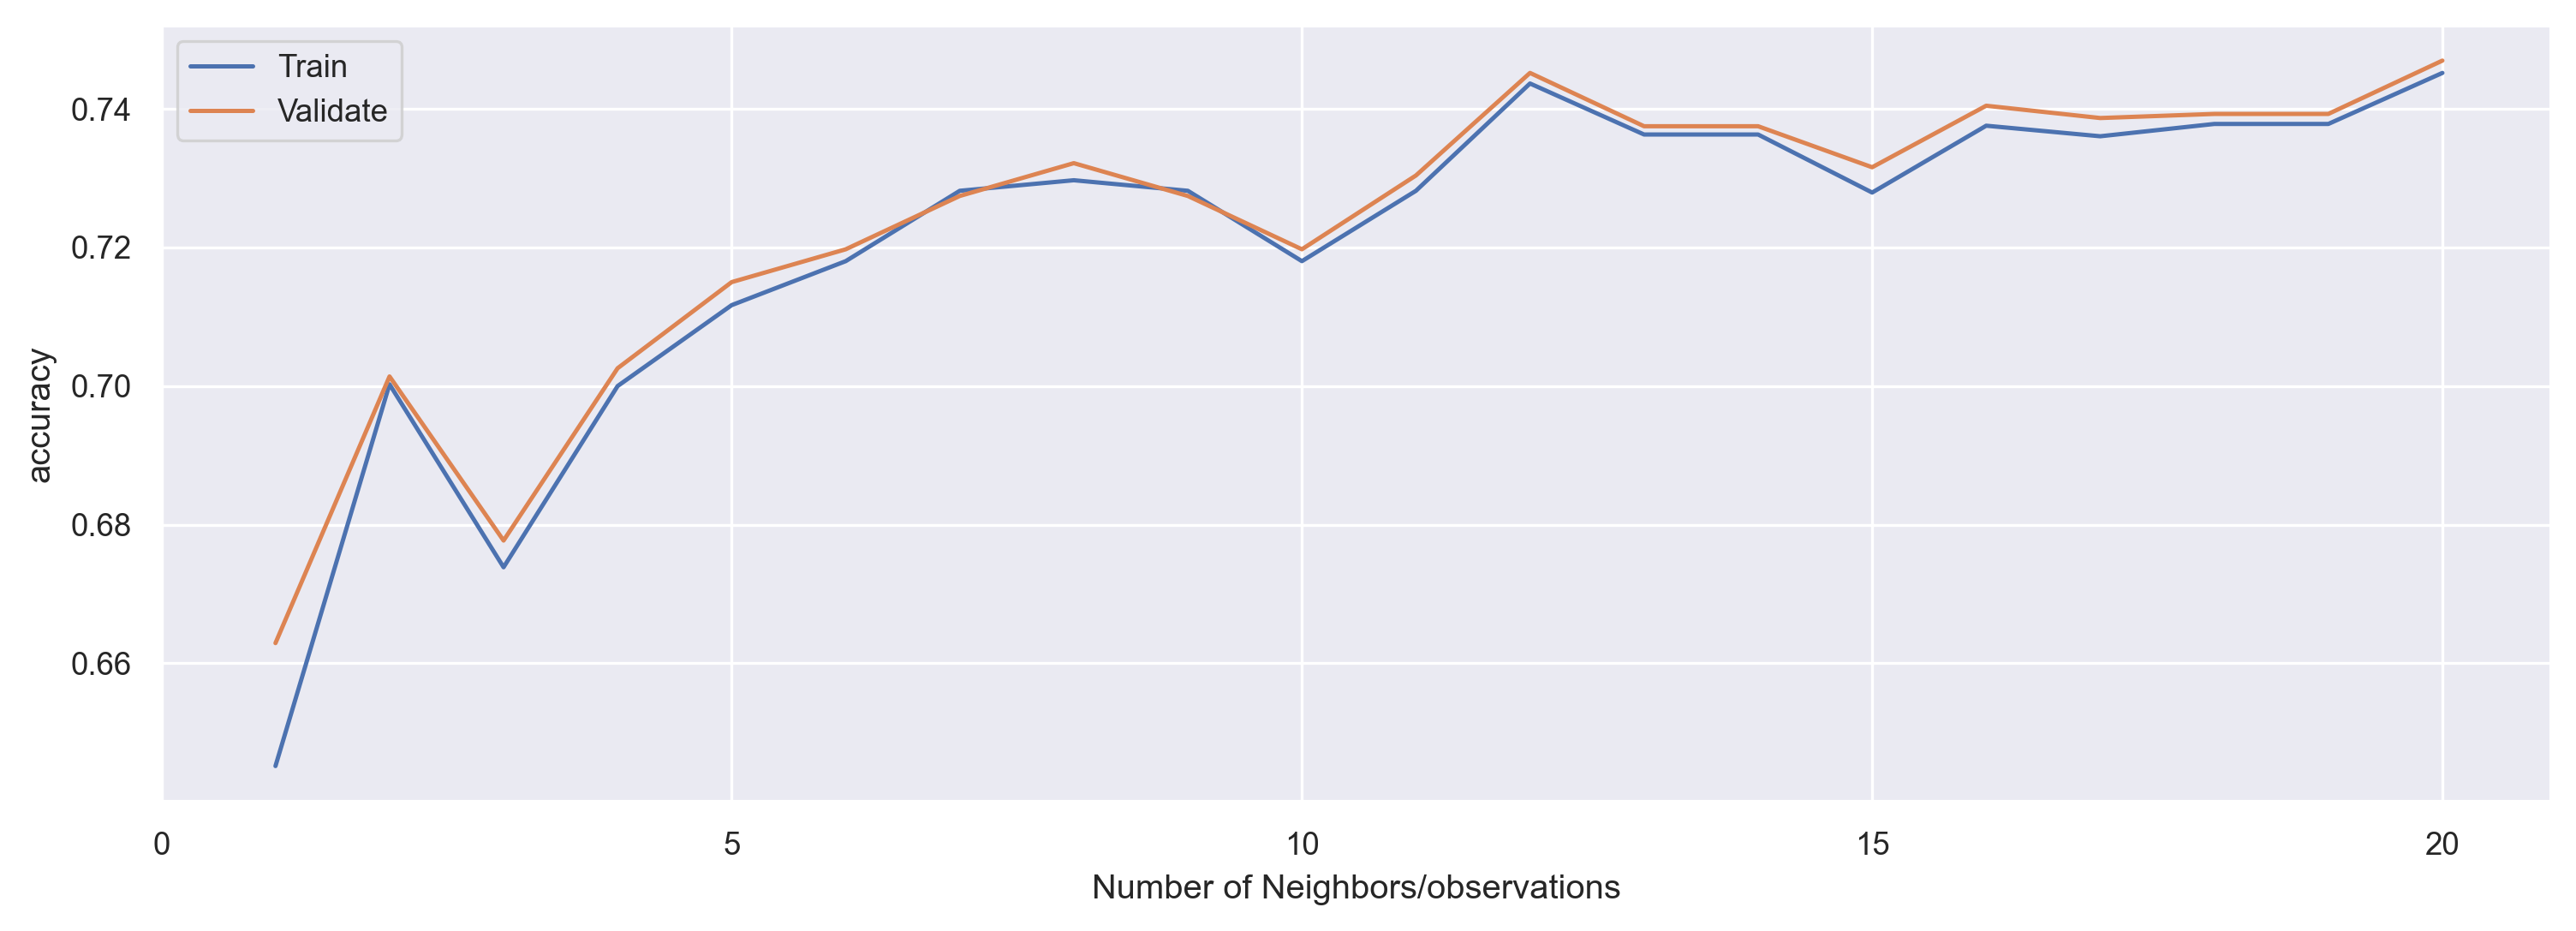

In [643]:
# plotting the "KNN" comparison across in-sample and out-sample datasets:

sns.set_theme("paper")

n_range = range(1, 21)
train_scores = []
validate_scores = []

for n in n_range:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    validate_scores.append(knn.score(X_validate, y_validate))

plt.figure(figsize=(12, 4))
plt.xlabel('Number of Neighbors/observations')
plt.ylabel('accuracy')
plt.plot(n_range, train_scores, label='Train')
plt.plot(n_range, validate_scores, label='Validate')
plt.legend()
plt.xticks([0,5,10,15,20])
plt.show()

In [644]:
metrics = []

for k in range(1, 21):
    # Make the model
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')

    # Fit the model (on train and only train)
    knn = knn.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = knn.score(X_train, y_train)
    
    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = knn.score(X_validate, y_validate)

    output = {
        "num_of_neighbors": k,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy}
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.train_accuracy)
df.round(2)

,num_of_neighbors,train_accuracy,validate_accuracy,percent_change_diff
0,1,0.65,0.66,-0.03
1,2,0.70,0.70,-0.00
2,3,0.67,0.68,-0.01
3,4,0.70,0.70,-0.00
4,5,0.71,0.71,-0.00
5,6,0.72,0.72,-0.00
6,7,0.73,0.73,0.00
7,8,0.73,0.73,-0.00
8,9,0.73,0.73,0.00
9,10,0.72,0.72,-0.00


----
### Evaluating Model on Test Dataset:


In [645]:
rf = RandomForestClassifier(min_samples_leaf = 4, max_depth = 4)
rf = rf.fit(X_train, y_train)

in_sample_accuracy = rf.score(X_train, y_train)
out_of_sample_accuracy = rf.score(X_validate, y_validate)

test_accuracy = rf.score(X_test, y_test)

In [646]:
print(f'Train Dataset Accuracy: {in_sample_accuracy}', "\n", "-----------------")
print(f"Validate Dataset Accuracy: {out_of_sample_accuracy}", "\n", "-----------------")
print(f"Test Dataset Accuracy: {test_accuracy}")

Train Dataset Accuracy: 0.7676895764646209 
 -----------------
Validate Dataset Accuracy: 0.7622708456534595 
 -----------------
Test Dataset Accuracy: 0.7565649396735273


----
### Deploying Random Forest Model on Telco Dataset

In [647]:
test.shape

(1409, 62)

In [648]:
# generating a new telco dataset for final predictions 

telco = get_telco_data()
telco.shape

(7043, 24)

In [649]:
# cleaning the dataset

telco = clean_telco_data(telco)
telco.shape

(7043, 21)

In [650]:
# generating dummy columns for categorical features
telco = dummy_columns(telco)

In [651]:
# rechecking shape after dummy variables

telco.shape

(7043, 62)

In [652]:
telco.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support_no_internet_service,tech_support_yes,streaming_tv_no,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no,streaming_movies_no_internet_service,streaming_movies_yes,paperless_billing_no,paperless_billing_yes
0,DSL,Mailed Check,One Year,0002-ORFBO,Female,False,Yes,Yes,9,Yes,...,0,1,0,0,1,1,0,0,0,1
1,DSL,Mailed Check,Month-to-Month,0003-MKNFE,Male,False,No,No,9,Yes,...,0,0,1,0,0,0,0,1,1,0
2,DSL,Credit Card (automatic),Month-to-Month,0013-MHZWF,Female,False,No,Yes,9,Yes,...,0,1,0,0,1,0,0,1,0,1
3,DSL,E-Check,Month-to-Month,0015-UOCOJ,Female,True,No,No,7,Yes,...,0,0,1,0,0,1,0,0,0,1
4,DSL,Mailed Check,Two Year,0016-QLJIS,Female,False,Yes,Yes,65,Yes,...,0,1,0,0,1,0,0,1,0,1


In [653]:
# setting my X and y variables for all customers

X = telco[[
'internet_service_type_fiber_optic', \
'internet_service_type_dsl', \
'internet_service_type_no_internet_service', \
'payment_type_credit_card_automatic', \
'payment_type_e_check', \
'payment_type_mailed_check', \
'payment_type_bank_transfer_automatic', \
'streaming_movies_no_internet_service', \
'streaming_movies_yes', \
'streaming_movies_no',
'tech_support_no_internet_service', \
'tech_support_yes', \
'tech_support_no']]

y = telco["churn"]

In [654]:
y_predictions = rf.predict(X)

In [655]:
# looking at the predictions:

y_predictions[0:21] # checks out!

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [656]:
y_predictions.shape

(7043,)

In [657]:
# converting the predictions into a Pandas Series

predictions = pd.Series(y_predictions, name = "predictions")
predictions

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: predictions, Length: 7043, dtype: bool

In [658]:
predictions.value_counts()

False    5755
True     1288
Name: predictions, dtype: int64

In [659]:
# creating test set prediction probabilities

y_probabilities = rf.predict_proba(X)

In [660]:
# viewing the probabilities

y_probabilities[0:21] # checks out!

array([[0.86762549, 0.13237451],
       [0.76178222, 0.23821778],
       [0.91147161, 0.08852839],
       [0.62136777, 0.37863223],
       [0.90009803, 0.09990197],
       [0.88051102, 0.11948898],
       [0.88865564, 0.11134436],
       [0.90009803, 0.09990197],
       [0.80763746, 0.19236254],
       [0.62136777, 0.37863223],
       [0.77137283, 0.22862717],
       [0.88051102, 0.11948898],
       [0.62136777, 0.37863223],
       [0.90009803, 0.09990197],
       [0.77137283, 0.22862717],
       [0.86762549, 0.13237451],
       [0.91187172, 0.08812828],
       [0.78449319, 0.21550681],
       [0.73069722, 0.26930278],
       [0.81007853, 0.18992147],
       [0.62136777, 0.37863223]])

In [661]:
# converting the probabilities into a Pandas Dataframe will make it easier to manipulate

probabilities = pd.DataFrame(y_probabilities).round(3)
probabilities

,0,1
0,0.868,0.132
1,0.762,0.238
2,0.911,0.089
3,0.621,0.379
4,0.900,0.100
...,...,...
7038,0.949,0.051
7039,0.925,0.075
7040,0.949,0.051
7041,0.921,0.079


In [662]:
probabilities.head()

,0,1
0,0.868,0.132
1,0.762,0.238
2,0.911,0.089
3,0.621,0.379
4,0.900,0.100


In [663]:
# renaming column header 1 as "churn_probability" and dropping the False/not-churn probability rate

probabilities = probabilities.drop(columns = 0).rename(columns = {1: "churn_probability"})

In [664]:
probabilities.head() # checks out!

,churn_probability
0,0.132
1,0.238
2,0.089
3,0.379
4,0.100


In [665]:
# let's now look at customer IDs

customers = telco["customer_id"].reset_index(drop = True)
customers.shape # checks out!

(7043,)

In [666]:
customers[0:51]

0     0002-ORFBO
1     0003-MKNFE
2     0013-MHZWF
3     0015-UOCOJ
4     0016-QLJIS
5     0017-DINOC
6     0019-GFNTW
7     0020-JDNXP
8     0022-TCJCI
9     0023-HGHWL
10    0032-PGELS
11    0056-EPFBG
12    0067-DKWBL
13    0068-FIGTF
14    0074-HDKDG
15    0076-LVEPS
16    0078-XZMHT
17    0080-EMYVY
18    0082-LDZUE
19    0083-PIVIK
20    0096-BXERS
21    0096-FCPUF
22    0104-PPXDV
23    0106-GHRQR
24    0112-QWPNC
25    0114-IGABW
26    0117-LFRMW
27    0121-SNYRK
28    0123-CRBRT
29    0128-MKWSG
30    0134-XWXCE
31    0156-FVPTA
32    0191-EQUUH
33    0191-ZHSKZ
34    0212-ISBBF
35    0214-JHPFW
36    0222-CNVPT
37    0224-HJAPT
38    0224-RLWWD
39    0228-MAUWC
40    0229-LFJAF
41    0230-UBYPQ
42    0230-WEQUW
43    0234-TEVTT
44    0238-WHBIQ
45    0244-LGNFY
46    0248-IPDFW
47    0253-ZTEOB
48    0254-KCJGT
49    0254-WWRKD
50    0257-KXZGU
Name: customer_id, dtype: object

In [667]:
print(type(probabilities), probabilities.shape)
print(type(predictions), predictions.shape)
print(type(customers), customers.shape)

<class 'pandas.core.frame.DataFrame'> (7043, 1)
<class 'pandas.core.series.Series'> (7043,)
<class 'pandas.core.series.Series'> (7043,)


In [668]:
df = pd.concat([probabilities, predictions, customers], axis = 1)

In [669]:
df.shape

(7043, 3)

In [670]:
df.head()

,churn_probability,predictions,customer_id
0,0.132,False,0002-ORFBO
1,0.238,False,0003-MKNFE
2,0.089,False,0013-MHZWF
3,0.379,False,0015-UOCOJ
4,0.100,False,0016-QLJIS


In [671]:
# rearraging columns for readibility 

df = df.rename(columns = {"predictions": "churn_prediction"})
df.columns

Index(['churn_probability', 'churn_prediction', 'customer_id'], dtype='object')

In [672]:
df.head()

,churn_probability,churn_prediction,customer_id
0,0.132,False,0002-ORFBO
1,0.238,False,0003-MKNFE
2,0.089,False,0013-MHZWF
3,0.379,False,0015-UOCOJ
4,0.100,False,0016-QLJIS


In [673]:
# rearraging columns 

df = df[["customer_id", "churn_probability", "churn_prediction"]]

In [674]:
df.head()

,customer_id,churn_probability,churn_prediction
0,0002-ORFBO,0.132,False
1,0003-MKNFE,0.238,False
2,0013-MHZWF,0.089,False
3,0015-UOCOJ,0.379,False
4,0016-QLJIS,0.100,False


In [675]:
df.shape

(7043, 3)

In [676]:
df.info() # checks out!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn_probability  7043 non-null   float64
 2   churn_prediction   7043 non-null   bool   
dtypes: bool(1), float64(1), object(1)
memory usage: 117.0+ KB


In [679]:
df.churn_prediction.value_counts()

False    5755
True     1288
Name: churn_prediction, dtype: int64

In [681]:
df.to_csv("/Users/mijailmariano/codeup-data-science/telco_classification/test.csv", index = False)